# Homework 2

## #Group16 :
+ **Dilara Isikli**
+ **Luca Avitabile**
+ **Riccardo Ceccaroni**

----

**Import Library:**

In [1]:
import json
import pandas as pd
from matplotlib.font_manager import FontProperties 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
from scipy.stats import chi2_contingency
import matplotlib.cm as cm
import matplotlib as mpl
import statsmodels.api as sm
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import operator
from matplotlib.patches import Rectangle, ConnectionPatch, Arc
import seaborn

**Import Dataset:**

In [2]:
players = pd.read_json(r"players.json", orient = 'record')
teams = pd.read_json(r"teams.json", orient = 'record')
coaches = pd.read_json(r"coaches.json", orient = 'record')

premier_league_events = pd.read_json(r"events_England.json", orient = 'record')
premier_league_matches = pd.read_json(r"matches_England.json", orient = 'record')

serie_a_events = pd.read_json(r'events_Italy.json', orient = 'record')
serie_a_matches = pd.read_json(r'matches_Italy.json', orient = 'record')

ligue_1_events = pd.read_json(r'events_France.json', orient = 'record')
ligue_1_matches = pd.read_json(r'matches_France.json', orient = 'record')

bundesliga_events = pd.read_json(r'events_Germany.json', orient = 'record')
bundesliga_matches = pd.read_json(r'matches_Germany.json', orient = 'record')

laliga_events = pd.read_json(r'events_Spain.json', orient = 'record')
laliga_matches = pd.read_json(r'matches_Spain.json', orient = 'record')

----

## RQ1

In [3]:
premier_league_matches_sorted_by_week = premier_league_matches.sort_values(by=['gameweek'], ascending=True) #sort matches by number of week 
#it is a pandas dataFrame
premier_league_by_week1 = {}
premier_league_by_week = {}

teams_list = []

gameweek_list = []
for index, match in premier_league_matches_sorted_by_week.iterrows():# premier_league_matches has two main row --> index and match
    
    gameweek = match['gameweek'] #create gameweek (int) from match
    teamsData = match['teamsData'] #create teamsData dic from match
    
    
    home_id, away_id, home_score, away_score, home_points, away_points = '', '', 0,0,0,0
   
    previous_points_home, previous_points_away = 0,0
    
    for key in teamsData: #iterate key in teamsdata
        
        if teamsData[key]['side'] == 'home': #if side of the key is home, home_id is equal to key
            home_id = int(key)
            home_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
        else: #if side of the key is away, home_id is equal to key
            away_id = int(key)
            away_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
  

    #calculate previous points for teams of home and away
    if gameweek > 1: 
        previous_points_home = premier_league_by_week[gameweek-1][home_id]['points']
        previous_points_away = premier_league_by_week[gameweek-1][away_id]['points']
   
    #compare score to decide gaing points for teams of home and away
    if home_score > away_score: 
        home_points = 3
        away_points = 0
    elif away_score > home_score:
        home_points = 0
        away_points = 3
    else:
        home_points = 1
        away_points = 1
        
    home_name = teams[teams["wyId"] == home_id].name.values[0]  #make equale wyId to home_id and take home name
    away_name = teams[teams["wyId"] == away_id].name.values[0]  #make equale wyId to home_id and take away name
    
    if home_name not in teams_list:
        teams_list.append(home_name)
    if gameweek not in gameweek_list:
        gameweek_list.append(gameweek)
    if gameweek in premier_league_by_week:
        premier_league_by_week[gameweek][home_id] = {'team_name' : home_name, 'points' : home_points + previous_points_home }
        premier_league_by_week1[gameweek][home_name] = {'points' : home_points  }
    else:
        premier_league_by_week[gameweek] = {home_id: {'team_name' : home_name, 'points' : home_points + previous_points_home}}
        premier_league_by_week1[gameweek] = {home_name: {'points' : home_points}}
    premier_league_by_week[gameweek][away_id] = {'team_name' : away_name, 'points' : away_points + previous_points_away }
    premier_league_by_week1[gameweek][away_name] = {'points' : away_points  }
    

+ **Find first two longest winning streaks:**

In [4]:
def longestWinningStreak(teamname):
    points_list= []
    localmax =2
    totalmax= 1
    dic_name_points = {}

    for key in premier_league_by_week1:
        
        points_list.append(premier_league_by_week1[key][teamname]['points'] )

    for z in range(1,39):


        if (z<=36) and (points_list[z-1] == points_list[z] == points_list[z+1]==3):
            localmax = localmax +1
        else:
            localmax = 2
        #print('local ' , localmax)

        if localmax > totalmax:
            totalmax = localmax

        
        dic_name_points[teamname] = totalmax
    return(dic_name_points)

WinningStreakAllTeam = {}
var1 = ''
List_WinningStreakAllTeam = []
for j in range(len(teams_list)):
    WinningStreakAllTeam =longestWinningStreak(teams_list[j])
    var1 = WinningStreakAllTeam[teams_list[j]]
    #print(var1)
    List_WinningStreakAllTeam.append(str(var1))

firstMax = 0
secondMax = 0
for i in range(20):
    if (    int(List_WinningStreakAllTeam[i]) > int(firstMax) ):
        firstMax = int(List_WinningStreakAllTeam[i])
        #print(firstMax)
    elif (int(List_WinningStreakAllTeam[i]) > secondMax and int(List_WinningStreakAllTeam[i]) != firstMax ):
        secondMax = int(List_WinningStreakAllTeam[i])
        #print(secondMax)
        
#print(secondMax)
#print(firstMax)
print('First Team/Teams Of Longest Winning Streak')
for m in range(len(teams_list)):
    if(int(List_WinningStreakAllTeam[m]) == int(firstMax)):
        print(teams_list[m], firstMax)

print('Second Team/Teams Of Longest Winning Streak')
for m in range(len(teams_list)):
    if(int(List_WinningStreakAllTeam[m]) == int(secondMax)):
        print(teams_list[m], secondMax)
   

First Team/Teams Of Longest Winning Streak
Manchester City 18
Second Team/Teams Of Longest Winning Streak
Tottenham Hotspur 7


+ **Find first two longest losing streaks:**

In [5]:
def longestLosingStreak(teamname):
    points_list= []
    localmax =2
    totalmax= 1
    dic_name_points = {}

    for key in premier_league_by_week1:
        
        points_list.append(premier_league_by_week1[key][teamname]['points'] )

    for z in range(1,39):


        if (z<=36) and (points_list[z-1] == points_list[z] == points_list[z+1]==0):
            localmax = localmax +1
        else:
            localmax = 2
        #print('local ' , localmax)

        if localmax > totalmax:
            totalmax = localmax

        
        dic_name_points[teamname] = totalmax
    return(dic_name_points)


LosingStreakAllTeam = {}
var2 = ''
List_LosingStreakAllTeam = []
for k in range(len(teams_list)):
    LosingStreakAllTeam =longestLosingStreak(teams_list[k])
    var2 = LosingStreakAllTeam[teams_list[k]]
    List_LosingStreakAllTeam.append(str(var2))
    
firstMin = 0
secondMin = 0
for i in range(20):
    if (    int(List_LosingStreakAllTeam[i]) > int(firstMin) ):
        firstMin = int(List_LosingStreakAllTeam[i])
        #print(firstMax)
    elif (int(List_LosingStreakAllTeam[i]) > secondMin and int(List_LosingStreakAllTeam[i]) != firstMin ):
        secondMin = int(List_LosingStreakAllTeam[i])

print('First Team/Teams Of Longest Losing Streak')
for m in range(len(teams_list)):
    if(int(List_LosingStreakAllTeam[m]) == int(firstMin)):
        print(teams_list[m], firstMin)

print('Second Team/Teams Of Longest Losing Streak')
for m in range(len(teams_list)):
    if(int(List_LosingStreakAllTeam[m]) == int(secondMin)):
        print(teams_list[m], secondMin)

First Team/Teams Of Longest Losing Streak
West Bromwich Albion 8
Second Team/Teams Of Longest Losing Streak
Crystal Palace 7


+ **Create A Dictionary With All Teams And Points For All Gameweeks And Create Plot:**

In [6]:
#create a dictionary with all teams and points for all gameweeks (we need these because of show values on plot)
dict_points = {}
for index,week in premier_league_by_week.items(): #premier_league_by_week is a dic 
    for key, team in week.items():
        if index == 1:
            dict_points[team['team_name']] = [] #define key for points dic
            dict_points[team['team_name']].append(team['points']) #append points for the team
        else:
            dict_points[team['team_name']].append(team['points']) #append points for the team

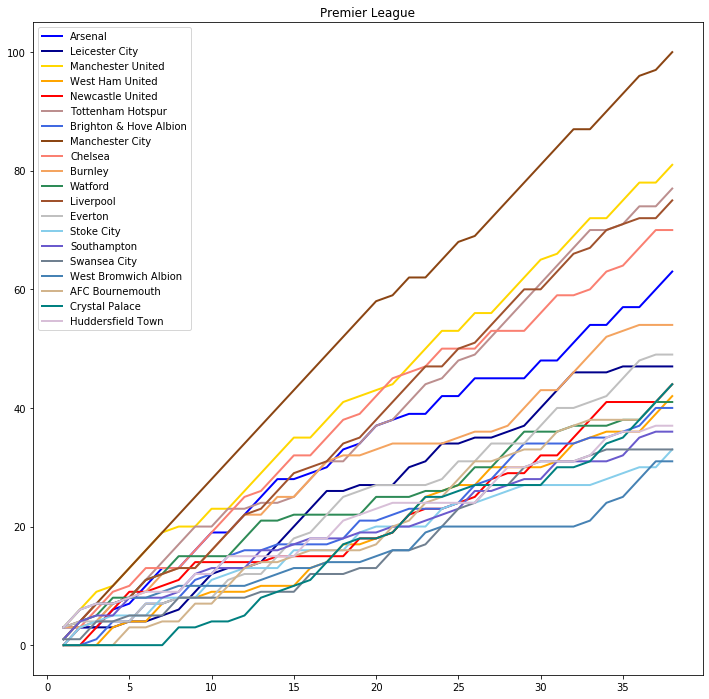

In [7]:
color_names = ['blue', 'darkblue','gold', 'orange','red','rosybrown','royalblue','saddlebrown','salmon','sandybrown',
               'seagreen','sienna','silver','skyblue','slateblue','slategray','steelblue','tan','teal','thistle',
               'tomato','turquoise','violet','wheat','white','whitesmoke','yellow','yellowgreen']


fontP = FontProperties()
fontP.set_size('medium')
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
i = 0
for key,element in dict_points.items():
    ax.plot(gameweek_list,list(element) ,c= color_names[i],ls='-',label=key, linewidth=2)
    i +=1
plt.title('Premier League')
plt.legend(prop=fontP)
plt.show()

---

## RQ2

In [8]:
# create a pandas dataframe with the teams playing at home/away
home_away = {}
for i in range(len(premier_league_matches['teamsData'])):
    home_away[i] = {}
    for x in premier_league_matches['teamsData'][i]:
        if premier_league_matches['teamsData'][i][x]['side'] == 'home':
            home_away[i].update({'home': x})
        else:
            home_away[i].update({'away': x})
home_away = pd.DataFrame(home_away).transpose()

In [9]:
# add home_away dataframe to Matches and select the columns for problem 1:
premier_league_matches_home_away = premier_league_matches.join(home_away)
subMatches = premier_league_matches_home_away[[ 'winner', 'home', 'away']]

In [10]:
#TeamL=list(set(subMatches['home']))

In [11]:
TeamL=list(set(subMatches['home']))

def TeamFrame(codeTeam):
    homeM = subMatches[(subMatches['home']==codeTeam)]
    awayM = subMatches[(subMatches['away']==codeTeam)]
    homeM_list=[]

    for i in range(len(homeM)):
        if(homeM.iloc[i]['winner']==int(homeM.iloc[i]['home'])):
            homeM_list.append('home_win')
        elif(homeM.iloc[i]['winner']==0):
            homeM_list.append('home_draw')
        else:
            homeM_list.append('home_lost')
    for i in range(len(awayM)):
        if(awayM.iloc[i]['winner']==int(awayM.iloc[i]['away'])):
            homeM_list.append('away_win')
        elif(awayM.iloc[i]['winner']==0):
            homeM_list.append('away_draw')
        else:
            homeM_list.append('away_lost')
    name = [codeTeam for i in range(38)]
    TeamFrame = pd.DataFrame(zip(name,homeM_list), columns = ['Team', 'Info'])
    
    return TeamFrame

Final = pd.concat([TeamFrame(codeTeam) for codeTeam in TeamL[-5:]])

In [12]:
Final['Team'] = pd.to_numeric(Final['Team'])

In [13]:
Final = pd.merge(Final,teams[['wyId','officialName']], left_on='Team', right_on='wyId')

In [14]:
Final = pd.crosstab(Final.officialName,Final.Info)
Final.transpose()

officialName,Brighton & Hove Albion FC,Crystal Palace FC,Manchester United FC,Watford FC,West Bromwich Albion FC
Info,,,,,
away_draw,6,6,4,2,4
away_lost,11,9,5,13,12
away_win,2,4,10,4,3
home_draw,8,5,2,7,9
home_lost,4,7,2,6,7
home_win,7,7,15,6,3


In [15]:
chi2_contingency(Final)

(34.07137285833676,
 0.025645913725990146,
 20,
 array([[ 4.4, 10. ,  4.6,  6.2,  5.2,  7.6],
        [ 4.4, 10. ,  4.6,  6.2,  5.2,  7.6],
        [ 4.4, 10. ,  4.6,  6.2,  5.2,  7.6],
        [ 4.4, 10. ,  4.6,  6.2,  5.2,  7.6],
        [ 4.4, 10. ,  4.6,  6.2,  5.2,  7.6]]))

----

## RQ3

In [16]:
# Add column 'Country' on Teams
country = pd.DataFrame([x['name'] for x in teams['area']],columns=['Country'])
teams_country = pd.merge(teams, country, left_index=True, right_index=True)
teams_england = teams_country[((teams_country['Country'] == 'England') | 
                               (teams_country['Country'] == 'Wales')) & (teams_country['type'] == 'club')]

In [17]:
# Add column 'Age' on Coaches
current_date = datetime.now().date()
age = []
for x in coaches['birthDate']:
    # because some coach doesn't have the birthDate
    try:
        age.append(int((current_date - date.fromisoformat(x)).days // 365))
    except:
        age.append(0)
age = pd.DataFrame(age, columns=['Age'], dtype=int)
coaches_age = pd.merge(coaches, age, left_index=True, right_index=True)

In [18]:
# check teams coaches in Matches and create pandas dataframe Coaches_Teams_England
teams_coaches = []
# for every matches we take the coach and put it in teams_coaches
for x in (premier_league_matches['teamsData']):
    for y in x:
        teams_coaches.append({'Team':x[y]['teamId'], 'Coach':x[y]['coachId']})
teams_coaches = pd.DataFrame(teams_coaches)

# merge coaches with teams_coaches
coaches_teams_england = pd.merge(teams_coaches, coaches_age[['currentTeamId', 'birthDate','Age','wyId']], left_on='Coach', right_on='wyId')
#merge Teams with Coaches_teams_England
coaches_teams_england = pd.merge(coaches_teams_england, teams_england[['wyId', 'officialName']], left_on='Team', right_on='wyId' )

'''
Clean DataFrame:
1) remove duplicate row
2) sort by birthDate
3) remove duplicate row with the same officialName and keep last == the youngest coach
''' 
coaches_teams_england = coaches_teams_england.drop_duplicates()
coaches_teams_england = coaches_teams_england.sort_values(by=['birthDate'])
all_coaches_teams_england = coaches_teams_england
coaches_teams_england = coaches_teams_england.drop_duplicates(subset='officialName', keep="last")

In [19]:
# Print the 10 teams with the youngest coaches
teams_young_coaches = coaches_teams_england.sort_values(by=['birthDate']).iloc[-10:]
print('\n'.join(list(teams_young_coaches['officialName'])))

Burnley FC
Southampton FC
Huddersfield Town FC
Swansea City AFC
Tottenham Hotspur FC
Newcastle United FC
Everton FC
Leicester City FC
Watford FC
AFC Bournemouth


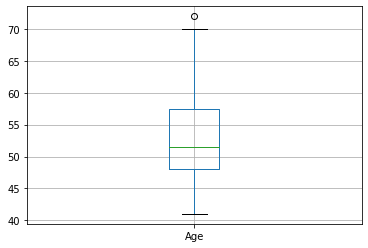

In [20]:
#Print Age boxplot
all_coaches_teams_england.boxplot(column="Age")
plt.show()

---

## RQ4

In [21]:
# Generate England_Players DataFrame
england_teams_ID_list = list(teams_england['wyId']) # list teams Id
player_list =[]
for x in england_teams_ID_list:
    player_list.append(players[players['currentTeamId'] ==x ])

england_players = pd.concat(player_list) #DF with England Players info

In [22]:
# Generate England_Events DataFrame
england_players_ID_list = list(england_players['wyId'])
event_list =[]
for x in england_players_ID_list:
    event_list.append(premier_league_events[premier_league_events['playerId'] == x ])

england_events = pd.concat(event_list) #DF with England Events info

In [23]:
england_events_pass = england_events[england_events['eventName']=='Pass'] # sub-DataFrame with player 'passes'

In [24]:
count_total_pass = {} # dict containing the sums of pass for each player initialized to 0
count_accurate_pass = {} # dict containing the sums of accurate pass for each player initialized to 0
count_ratio_pass = {} # dict containing the ratio = count_accurate_pass/count_total_pass

# initialize
for x in england_players_ID_list:
    
    count_total_pass.update({x:0})
    count_accurate_pass.update({x:0})
    count_ratio_pass.update({x:0})

# count
i = 0
for x in england_events_pass['playerId']:

    count_total_pass[x] += 1
    if str(england_events_pass['tags'].iloc[i]).find('1801') > 0:
        count_accurate_pass[x] += 1
    i +=1    

In [25]:
n = 1000 # minimum threshold

for x in england_players_ID_list: 
    if count_total_pass[x] < n:
        del count_ratio_pass[x]
    else:
        count_ratio_pass[x] = count_accurate_pass[x] / count_total_pass[x]

In [26]:
player_pass =[x[1] for x in sorted((value,key) for (key,value) in count_ratio_pass.items())]

In [27]:
# PRINT
player_pass =[x[1] for x in sorted((value,key) for (key,value) in count_ratio_pass.items())[-10:]] # list of id players to print
for i in player_pass:
    print(players[players['wyId']==i]['shortName'].iloc[0])

D. Lovren
Fernandinho
M. Demb\u00e9l\u00e9
\u0130. G\u00fcndo\u011fan
N. Otamendi
P. Jones
A. Christensen
V. Kompany
F. Delph
J. Stones


---

## RQ5

In [28]:
england_events_air_duel = england_events[england_events['subEventName']=='Air duel'] # sub-DataFrame with player 'passes'

In [29]:
count_total_air_duel = {} # dict containing the sums of air_duel for each player initialized to 0
count_accurate_air_duel = {} # dict containing the sums of accurate air_duel for each player initialized to 0
count_ratio_air_duel = {} # dict containing the ratio = count_accurate_air_duel/count_total_air_duel

# initialize
for x in england_players_ID_list:
    count_total_air_duel.update({x:0})
    count_accurate_air_duel.update({x:0})
    count_ratio_air_duel.update({x:0})

# count
i = 0
for x in england_events_air_duel['playerId']:
    count_total_air_duel[x] += 1
    if str(england_events_air_duel['tags'].iloc[i]).find('1801') > 0:
        count_accurate_air_duel[x] += 1
    i +=1    

In [30]:
n = 10 # minimum threshold

for x in england_players_ID_list: 
    if count_total_air_duel[x] < n:
        del count_ratio_air_duel[x]
    else:
        count_ratio_air_duel[x] = count_accurate_air_duel[x] / count_total_air_duel[x]

In [31]:
# Create player_ratio_air_duel DataFrame
lst_player = []
lst_ratio_air_duel = []
for x in count_ratio_air_duel:
    lst_player.append(x)
    lst_ratio_air_duel.append(count_ratio_air_duel[x])
player_ratio_air_duel = pd.DataFrame({'PlayersId':lst_player, 'Ratio air duel': lst_ratio_air_duel})

In [32]:
# Merge player_ratio_air_duel with England Players
air_duel_height = pd.merge(player_ratio_air_duel, england_players[['height', 'wyId', 'shortName']], left_on='PlayersId', right_on='wyId' )

In [33]:
list_id = []
list_class = []
for i in range(len(players['height'])):
    if players.iloc[i]['height'] < 160:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(150)
    elif players.iloc[i]['height'] >= 160 and players.iloc[i]['height'] < 170:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(160)
    elif players.iloc[i]['height'] >= 170 and players.iloc[i]['height'] < 175:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(170)
    elif players.iloc[i]['height'] >= 175 and players.iloc[i]['height'] < 180:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(175)
    elif players.iloc[i]['height'] >= 180 and players.iloc[i]['height'] < 185:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(180)
    elif players.iloc[i]['height'] >= 185 and players.iloc[i]['height'] < 190:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(185)
    elif players.iloc[i]['height'] >= 190 and players.iloc[i]['height'] < 195:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(190)
    elif players.iloc[i]['height'] >= 195 and players.iloc[i]['height'] < 200:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(195)
    else:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(205)

clas = pd.DataFrame(data = list_class, index = list_id, columns=['Class'])
air_duel_height_class = pd.merge(air_duel_height, clas, left_on='PlayersId', right_index=True )

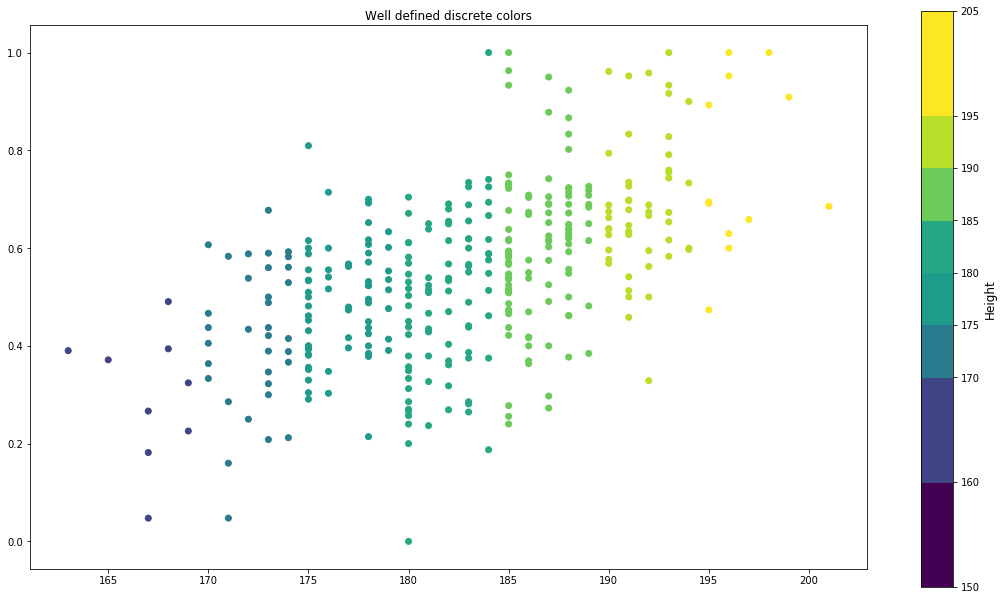

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))  # setup the plot

x = air_duel_height_class['height']  # define the data
y = air_duel_height_class['Ratio air duel']  # define the data
tag = air_duel_height_class['Class']
#tag[10:12] = 0  # make sure there are some 0 values to show up as grey

cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
#cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist=[0,1,2,3,4,5,6,7,8]
cmaplist[0] = (0.267004, 0.004874, 0.329415, 1.)
cmaplist[1] = (0.262138, 0.242286, 0.520837, 1.)
cmaplist[2] = (0.177423, 0.437527, 0.557565, 1.)
cmaplist[3] = (0.119512, 0.607464, 0.540218, 1.)
cmaplist[4] = (0.119512, 0.607464, 0.540218, 1.)
cmaplist[5] = (0.166383, 0.690856, 0.496502, 1.)
cmaplist[6] = (0.525776, 0.833491, 0.288127, 1.)
cmaplist[7] = (0.762373, 0.876424, 0.137064, 1.)
cmaplist[8] = (0.993248, 0.906157, 0.143936, 1.)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
   'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds =  np.array([150,160,170,175,180,185,190,195,205])#np.linspace(0, 5, 6)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x, y, c=tag, 
                  cmap=cmap, norm=norm)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

ax.set_title('Well defined discrete colors')
ax2.set_ylabel('Height', size=12)
plt.show()

                            OLS Regression Results                            
Dep. Variable:         Ratio air duel   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     162.1
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           7.99e-31
Time:                        22:18:06   Log-Likelihood:                 179.42
No. Observations:                 355   AIC:                            -354.8
Df Residuals:                     353   BIC:                            -347.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0797      0.206    -10.073      0.0

c:\users\ricca\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


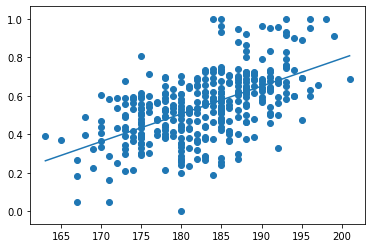

In [35]:
X = air_duel_height_class['height']  # define the data
Y = air_duel_height_class['Ratio air duel']  # define the data

results = sm.OLS(Y,sm.add_constant(X)).fit()

print(results.summary())

plt.scatter(X,Y)

X_plot = np.linspace(155,215,100)

plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)))
plt.show()

---

## RQ6

In [36]:
#with this loop we create two lists with home_team and away_team
home=[]
away=[]
for x in premier_league_matches['teamsData']:
    
    for y in x:
        d = {}
        if x[y]['side'] == 'home':
            d['home'] = y
            home.append(y)
        else:
            d['away'] = y
            away.append(y)

In [37]:
premier_league_matches_sorted_by_week = premier_league_matches.sort_values(by=['gameweek'], ascending=True) 
#sort matches by number of week 
#it is a pandas dataFrame
premier_league_by_week1 = {}
premier_league_by_week = {}

teams_list = []

gameweek_list = []
ht_goal=[]  #list to append the number of goal scored from the home team
at_goal=[]  #list to append the number of goal scored from the away team
for index, match in premier_league_matches_sorted_by_week.iterrows():
    # premier_league_matches has two main row --> index and match
    
    gameweek = match['gameweek'] #create gameweek (int) from match
    teamsData = match['teamsData'] #create teamsData dic from match
    
    
    home_id, away_id, home_score, away_score, home_points, away_points = '', '', 0,0,0,0
   
    previous_points_home, previous_points_away = 0,0
    
    for key in teamsData: #iterate key in teamsdata
        
        if teamsData[key]['side'] == 'home': #if side of the key is home, home_id is equal to key
            home_id = int(key)
            home_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
            ht_goal.append(home_score)
        else: #if side of the key is away, home_id is equal to key
            away_id = int(key)
            away_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
            at_goal.append(away_score)

In [38]:
matches_teams_VS = pd.DataFrame([list(x.keys()) for x in premier_league_matches.teamsData])
WL = pd.DataFrame({'home':home, 'away':away , 'winner':premier_league_matches.winner,'week': premier_league_matches.gameweek})
WL= WL.sort_values('week') #order based on week
WL['home_goal'] = ht_goal
WL['away_goal'] = at_goal
#WL[-10:]

In [39]:
#Function that calculate the total of goal scored (TGS) and total of goal recived (TGR)
#each team has a code ID
def Total_Goal(code):
    aaa= WL[WL['home']==str(code)]
    bbb= WL[WL['away']==str(code)]
    TGS = sum(aaa['home_goal'])+sum(bbb['away_goal'])
    TGR= sum(aaa['away_goal'])+sum(bbb['home_goal'])
    return([TGS,TGR])

In [40]:
# for loop that takes every code of Premier League's teams:
# to do that we take every matches played in the first week and we append to a list teams ID
teams_en=[]
WL[WL['week']==1]
for i in range(10):
    teams_en.append(home[i])
    teams_en.append(away[i])
#print(teams_en) #print codes 

In [41]:
#we create a for loop that uses the function to create two lists
#in the first list 'tgs' we append the total of goals scored for each team
#in the second 'tgr' the number of goals recived
tgs=[]
tgr=[]
for i in range(20):
    tgs.append(Total_Goal(teams_en[i])[0])
    tgr.append(Total_Goal(teams_en[i])[1])

In [42]:
GoalRank= pd.DataFrame(list(zip(teams_en,tgs,tgr)))
GoalRank.columns = [0, 'TGS','TGR']
GoalRank[0] = pd.to_numeric(GoalRank[0])
GoalRank = pd.merge(GoalRank,teams[['officialName','wyId']], left_on = 0, right_on = 'wyId')
GoalRank = GoalRank[['wyId', 'officialName', 'TGS', 'TGR']]
#GoalRank.head()

In [43]:
# inizialize scores
game_weeks = set(WL['week'])
teams_playing = set(WL['home'])
scores = {}
for i in game_weeks:
    scores[i] = {}
    for x in teams_playing:
        scores[i].update({x:0})

# calculate scores
for i in range(len(WL['week'])):
    if int(WL['winner'][i]) != 0:
        scores[WL['week'][i]][str(WL['winner'][i])] += 3
    else:
        scores[WL['week'][i]][str(WL['home'][i])] += 1
        scores[WL['week'][i]][str(WL['away'][i])] += 1
partial_scores = pd.DataFrame(scores)
#
for x in range(2, len(scores)+1):
    for y in scores[x]:
        scores[x][y] += scores[x-1][y]

#
scores = pd.DataFrame(scores)

In [44]:
#from the table of cumulative scores, we take the last column which is the final rank
scores1= pd.DataFrame(scores[38])
scores1.columns = [0]
scores1= scores1.sort_values(0, ascending=False)
#scores1.head()

In [45]:
#we replicate the team_ID to merge 2 different table
listcode=scores1.index
scores1['Team_ID']=listcode
#scores1.head()

In [46]:
GoalRank=GoalRank.sort_values('TGS',ascending= False)
#GoalRank.head()
#merge

In [47]:
scores1['Team_ID'] = pd.to_numeric(scores1['Team_ID'])
P1 = pd.merge(GoalRank,scores1,left_on='wyId', right_on='Team_ID')
P1 = P1.sort_values(0, ascending=False)
P1.columns= ['wyId','officialName','TGS','TGR','Points','ID']
P1.Points = range(1,21,1)
P1.columns= ['wyId','officialName','TGS','TGR','Rank','ID']
#P1

In [48]:
TGS=list(P1['TGS'])
TGR=list(P1['TGR'])
number= range(1,21)

In [49]:
rank = list(P1['wyId'])
#rank

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     28.88
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           4.17e-05
Time:                        22:18:17   Log-Likelihood:                -68.759
No. Observations:                  20   AIC:                             141.5
Df Residuals:                      18   BIC:                             143.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.5316      3.688      9.093      0.0

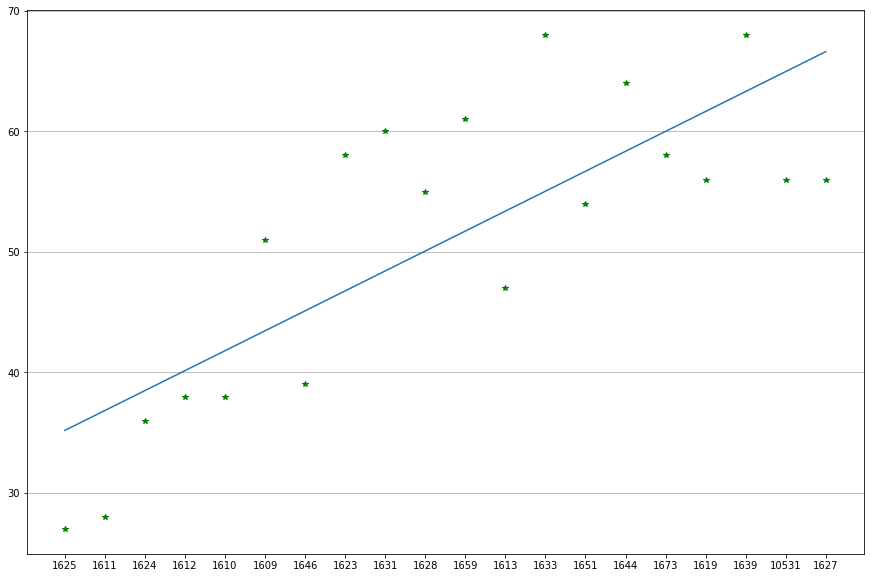

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
x = number
y = TGR
results1 = sm.OLS(y,sm.add_constant(x)).fit()

print(results1.summary())

my_xticks = rank #lista delle squadre ordinate in base al ranking
plt.xticks(x, my_xticks)
plt.plot(x, y, 'g*')
plt.grid(axis='y', linestyle='-')

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     45.48
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           2.55e-06
Time:                        22:18:18   Log-Likelihood:                -76.123
No. Observations:                  20   AIC:                             156.2
Df Residuals:                      18   BIC:                             158.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.4000      5.329     15.463      0.0

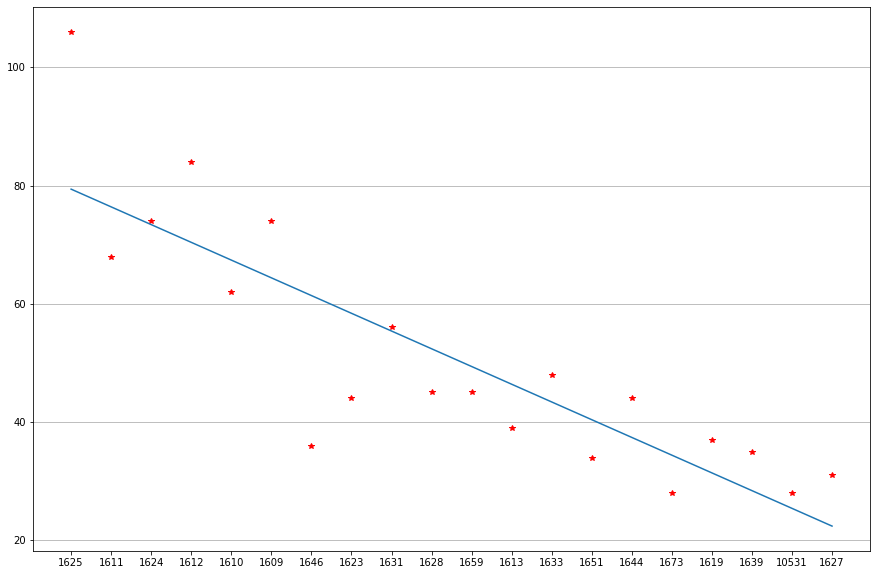

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
x = number
y1 = TGS
results2 = sm.OLS(y1,sm.add_constant(x)).fit()

print(results2.summary())

my_xticks = rank #lista delle squadre ordinate in base al ranking
plt.xticks(x, my_xticks)
plt.plot(x, y1, 'r*')
plt.grid(axis='y', linestyle='-')

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y1, 1))(np.unique(x)))
plt.show()

These figures show the linear correlation between goals and final position in rank.
Both have a high R-Squared so they are both satisfactory
The second has a higher R-squared which means that in Premier League there is a stronger correlation between goals scored and final rank's position

---

## CRQ1

In [53]:
# CREATE CRQ1_df DataFrame with only goals event with playerId,teamId, 'matchPeriod', 'eventSec'
CRQ1_df = premier_league_events[['tags', 'playerId', 'teamId', 'matchPeriod', 'eventSec']]

CRQ1_list = [] # list contain the row with 101 tag
for x in range(len(premier_league_events['tags'])):
    if ({'id': 101} in CRQ1_df.tags[x]) and ({'id': 1801} in CRQ1_df.tags[x]):
        CRQ1_list.append(CRQ1_df.iloc[x]) # append row with 101 tag at CRQ1_list
CRQ1_df = pd.DataFrame(CRQ1_list) # dataset with only goals event
CRQ1_df.index = range(len(CRQ1_df.index)) # set index
CRQ1_df = CRQ1_df[['playerId','teamId','matchPeriod', 'eventSec']] # remove column 'tag'

In [54]:
# Divide time to interval
import intervals as I
CRQ1_df['matchPeriod'].to_string
pd.set_option('mode.chained_assignment', None)
for x in range(len(CRQ1_df['eventSec'])):
    if CRQ1_df['matchPeriod'][x] == '1H':
        if (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(0,9):
            CRQ1_df['matchPeriod'].iloc[x] = '[0-09)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(9,18):
            CRQ1_df['matchPeriod'].iloc[x] = '[09-18)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(18,27):
            CRQ1_df['matchPeriod'].iloc[x] = '[18-27)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(27,36):
            CRQ1_df['matchPeriod'].iloc[x] = '[27-36)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(36,45):
            CRQ1_df['matchPeriod'].iloc[x] = '[36-45)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) >= 45:
            CRQ1_df['matchPeriod'].iloc[x] = '[45+)'
    elif CRQ1_df['matchPeriod'][x] == '2H':
        if (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(0,9):
            CRQ1_df['matchPeriod'].iloc[x] = '[45-54)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(9,18):
            CRQ1_df['matchPeriod'].iloc[x] = '[54-63)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(18,27):
            CRQ1_df['matchPeriod'].iloc[x] = '[63-72)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(27,36):
            CRQ1_df['matchPeriod'].iloc[x] = '[72-81)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) in I.IntInterval.closed_open(36,46):
            CRQ1_df['matchPeriod'].iloc[x] = '[81-90)'
        elif (CRQ1_df['eventSec'].iloc[x]/60) >= 45:
            CRQ1_df['matchPeriod'].iloc[x] = '[90+)'
    elif CRQ1_df['matchPeriod'][x] == 'E1':
         CRQ1_df['matchPeriod'].iloc[x] = '[45+)'
    elif CRQ1_df['matchPeriod'][x] == 'E2':
         CRQ1_df['matchPeriod'].iloc[x] = '[90+)'
    else:
        pass
CRQ1_df = CRQ1_df[['playerId','teamId','matchPeriod']] # delete 'eventSec'

In [55]:
# Sorted intervl period and count numbers of same interval
interval = sorted(list(set(list(CRQ1_df['matchPeriod']))))
count_interval = []
for x in interval:
    count_interval.append(len(CRQ1_df[CRQ1_df['matchPeriod']==x]))

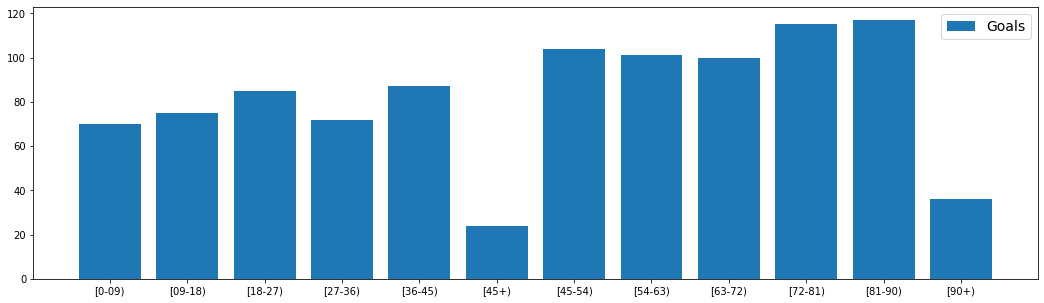

In [56]:
# Show bar plot
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)
plt.bar(interval, count_interval, label = 'Goals')

ax.legend(fontsize = 14)
plt.show()

In [57]:
# Create DataFrame by interval of 81-90 and sorted it
Team_81_90 =CRQ1_df[CRQ1_df['matchPeriod']=='[81-90)']
team_81_90 = sorted(list(set(list(Team_81_90['teamId']))))

In [58]:
# count numbers of goals in interval of 81-90 for each team
count_team_81_90 = {}
for x in team_81_90:
    count_team_81_90.update({x:len(Team_81_90[Team_81_90['teamId']==x])})

In [59]:
# sorted dictionary of teams and goals number by goal numbers
count_team_81_90
sorted_count_team_81_90 = sorted(count_team_81_90.items(), key=operator.itemgetter(1))

In [60]:
#create a list team for find the top 10 teams score the most in interval 81-90
list_Teams=[]
for x in sorted_count_team_81_90[-10:]:
    list_Teams.append(x[0])

In [61]:
#top 10 teams score the most in interval 81-90
for x in list_Teams:
    print(teams[teams['wyId']==x]['officialName'].iloc[0])

Tottenham Hotspur FC
West Ham United FC
AFC Bournemouth
Crystal Palace FC
Liverpool FC
Watford FC
Chelsea FC
Arsenal FC
Manchester United FC
Manchester City FC


In [62]:
#create a sorted list of player id and find players that were able to score at least one goal in 8 different intervals.
list_player = sorted(list(set(list(CRQ1_df['playerId']))))
player_8_different_interval=[]
for x in list_player:
    if len(set(list(CRQ1_df[CRQ1_df['playerId']==x]['matchPeriod'])))>=8:
        player_8_different_interval.append(x)
for x in player_8_different_interval:#range(len(Teams)):
    print(players[players['wyId']==x]['shortName'].iloc[0])

\u00c1lvaro Morata
R. Lukaku
W. Zaha
H. Kane
R. Sterling
J. Vardy
M. Arnautovi\u0107
Roberto Firmino
A. Lacazette
R. Mahrez
Mohamed Salah
Gabriel Jesus


---

## CRQ2

+ **First Part:**

In [63]:
Match_Barcelona_RealMadrid = laliga_matches[laliga_matches['label'] == 'Barcelona - Real Madrid, 2 - 2'].iloc[0]
id_Match_Barcelona_RealMadrid = Match_Barcelona_RealMadrid['wyId']

Player_L_Messi = players[players['shortName']=='L. Messi'].iloc[0]
id_L_Messi = Player_L_Messi['wyId']
Player_C_Ronaldo = players[players['shortName']=='Cristiano Ronaldo'].iloc[0]
id_C_Ronaldo = Player_C_Ronaldo['wyId']

In [64]:
Event_Ronaldo = laliga_events[(laliga_events['playerId']==id_C_Ronaldo)&(laliga_events['matchId']==id_Match_Barcelona_RealMadrid)]
Event_Messi = laliga_events[(laliga_events['playerId']==id_L_Messi)&(laliga_events['matchId']==id_Match_Barcelona_RealMadrid)]

In [65]:
Event_Ronaldo = Event_Ronaldo[(Event_Ronaldo['eventName']=='Duel')|(Event_Ronaldo['eventName']=='Free Kick')|
                              (Event_Ronaldo['eventName']=='Pass')|(Event_Ronaldo['eventName']=='Shot')]
Event_Messi = Event_Messi[(Event_Messi['eventName']=='Duel')|(Event_Messi['eventName']=='Free Kick')|
                          (Event_Messi['eventName']=='Pass')|(Event_Messi['eventName']=='Shot')]

In [66]:
Positions_Event_Ronaldo =  Event_Ronaldo['positions']
Positions_Event_Messi = Event_Messi['positions']

In [67]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

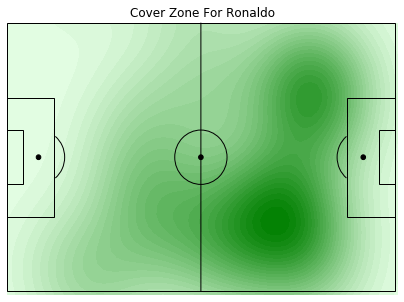

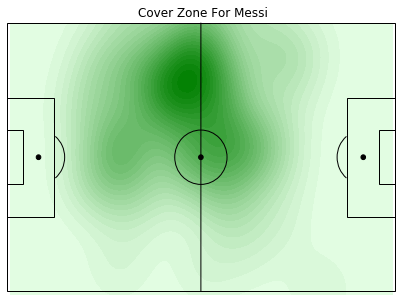

In [68]:
fig=plt.figure() #set up the figures
#fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-1, 80)
plt.xlim(0, 121)
plt.title('Cover Zone For Ronaldo')
plt.axis('off')

x_coord = [i[0]['x'] for i in Positions_Event_Ronaldo]
y_coord = [i[0]['y'] for i in Positions_Event_Ronaldo]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
seaborn.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
plt.show()


fig=plt.figure() #set up the figures
#fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-1, 80)
plt.xlim(0, 121)
plt.title('Cover Zone For Messi')

plt.axis('off')

x_coord = [(i[0]['x']-13)*1.115 for i in Positions_Event_Messi]
y_coord = [i[0]['y'] for i in Positions_Event_Messi]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
seaborn.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
plt.show()

In [69]:
Positions_Event_Messi

593485    [{'y': 87, 'x': 74}, {'y': 91, 'x': 80}]
593489    [{'y': 87, 'x': 67}, {'y': 71, 'x': 43}]
593499    [{'y': 66, 'x': 58}, {'y': 78, 'x': 75}]
593501    [{'y': 67, 'x': 65}, {'y': 38, 'x': 63}]
593503    [{'y': 38, 'x': 63}, {'y': 43, 'x': 69}]
                            ...                   
595053    [{'y': 76, 'x': 84}, {'y': 72, 'x': 96}]
595055      [{'y': 72, 'x': 96}, {'y': 0, 'x': 0}]
595106    [{'y': 83, 'x': 44}, {'y': 93, 'x': 36}]
595131     [{'y': 8, 'x': 44}, {'y': 42, 'x': 63}]
595225    [{'y': 47, 'x': 39}, {'y': 57, 'x': 46}]
Name: positions, Length: 92, dtype: object

**COMMENT:** 
At this point we built two heatmaps which are graphics that represents the global position of a player during a match.
In the first heatmap we showed the position of Cristiano Ronaldo during Barcelona -Real Madrid while in the second one we showed Lionel Messi's position during Barcelona - Real Madrid.
The heatmaps show role differences between two players, in fact Messi spent time during major part of the match on near the middle of field when Ronaldo spent time more time on more advantageous positions.
Ronaldo's heatmap reveal also that might could have been a tattic change during the match, in fact there are two major spots near the penalty area, one at the right and one at the left side of the field where Ronaldo spend lot of time

+ **Second Part:**

In [70]:
Match_Juventus_Napoli = serie_a_matches[serie_a_matches['label'] == 'Juventus - Napoli, 0 - 1'].iloc[0]
id_Match_Juventus_Napoli = Match_Juventus_Napoli['wyId']

Player_Jorginho = players[players['shortName']=='Jorginho'].iloc[0]
id_Jorginho = Player_Jorginho['wyId']
Player_Miralem_Pjanic = players[players['firstName']=='Miralem'].iloc[0]
id_Miralem_Pjanic = Player_Miralem_Pjanic['wyId']

In [71]:
Event_Jorginho = serie_a_events[(serie_a_events['playerId']==id_Jorginho)&(serie_a_events['matchId']==id_Match_Juventus_Napoli)]
Event_Miralem_Pjanic = serie_a_events[(serie_a_events['playerId']==id_Miralem_Pjanic)&(serie_a_events['matchId']==id_Match_Juventus_Napoli)]

In [72]:
Pass_Jorginho = Event_Jorginho[Event_Jorginho['eventName']=='Pass']
Accurate_Pass_Jorginho_list = [] # list contain the row with 1801 tag
for x in range(len(Pass_Jorginho['tags'])):
    if {'id': 1801} in Pass_Jorginho.tags.iloc[x]:
        Accurate_Pass_Jorginho_list.append(Pass_Jorginho.iloc[x])
Accurate_Pass_Jorginho = pd.DataFrame(Accurate_Pass_Jorginho_list)
Pass_Miralem_Pjanic = Event_Miralem_Pjanic[Event_Miralem_Pjanic['eventName']=='Pass']
Accurate_Pass_Miralem_Pjanic_list = [] # list contain the row with 1801 tag
for x in range(len(Pass_Miralem_Pjanic['tags'])):
    if {'id': 1801} in Pass_Miralem_Pjanic.tags.iloc[x]:
        Accurate_Pass_Miralem_Pjanic_list.append(Pass_Miralem_Pjanic.iloc[x])
Accurate_Pass_Miralem_Pjanic = pd.DataFrame(Accurate_Pass_Miralem_Pjanic_list)

In [73]:
Positions_Pass_Jorginho = Pass_Jorginho['positions']
Positions_Accurate_Pass_Jorginho = Accurate_Pass_Jorginho['positions']
Positions_Pass_Miralem_Pjanic = Pass_Miralem_Pjanic['positions']
Positions_Accurate_Pass_Miralem_Pjanic = Accurate_Pass_Miralem_Pjanic['positions']

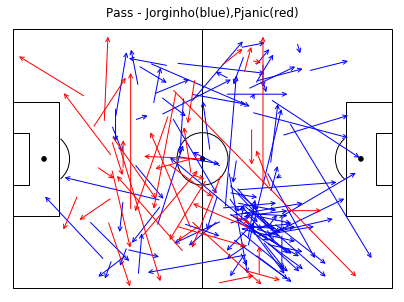

In [74]:
fig=plt.figure() #set up the figures
#fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.title('Pass - Jorginho(blue),Pjanic(red)')
plt.axis('off')

for i in range(len(Positions_Pass_Jorginho)):
    ax.annotate("",xy=(Positions_Pass_Jorginho.iloc[i][1]['x']*1.2,Positions_Pass_Jorginho.iloc[i][1]['y']*0.8), xytext=(Positions_Pass_Jorginho.iloc[i][0]['x']*1.2,Positions_Pass_Jorginho.iloc[i][0]['y']*0.8), arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
    
for i in range(len(Positions_Accurate_Pass_Miralem_Pjanic)):
    ax.annotate("",xy=(Positions_Pass_Miralem_Pjanic.iloc[i][1]['x']*1.2,Positions_Pass_Miralem_Pjanic.iloc[i][1]['y']*0.8), xytext=(Positions_Pass_Miralem_Pjanic.iloc[i][0]['x']*1.2,Positions_Pass_Miralem_Pjanic.iloc[i][0]['y']*0.8), arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))

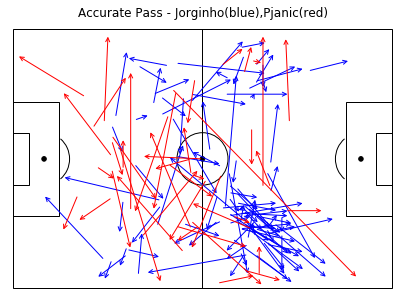

In [75]:
fig=plt.figure() #set up the figures
#fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.title('Accurate Pass - Jorginho(blue),Pjanic(red)')
plt.axis('off')
for i in range(len(Positions_Accurate_Pass_Jorginho)):
    ax.annotate("",xy=(Positions_Accurate_Pass_Jorginho.iloc[i][1]['x']*1.2,Positions_Accurate_Pass_Jorginho.iloc[i][1]['y']*0.8), xytext=(Positions_Accurate_Pass_Jorginho.iloc[i][0]['x']*1.2,Positions_Accurate_Pass_Jorginho.iloc[i][0]['y']*0.8), arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
    
for i in range(len(Positions_Accurate_Pass_Miralem_Pjanic)):
    ax.annotate("",xy=(Positions_Accurate_Pass_Miralem_Pjanic.iloc[i][1]['x']*1.2,Positions_Accurate_Pass_Miralem_Pjanic.iloc[i][1]['y']*0.8), xytext=(Positions_Accurate_Pass_Miralem_Pjanic.iloc[i][0]['x']*1.2,Positions_Accurate_Pass_Miralem_Pjanic.iloc[i][0]['y']*0.8), arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))

**COMMENT:**
After a comparison between the two graphics we can say that pjanic made less passes compared to Jorginho, but Pjanic's passes are more accurated than the Jorginho's passes.
We can also say that Jorginho tempted passes in the most advanced part of the soccerfield, that kind of passes are the most difficult but also the most important passes to score a goal.

---

# Bonus

# ITALY

## RQ1

In [76]:
serie_a_matches_sorted_by_week = serie_a_matches.sort_values(by=['gameweek'], ascending=True) #sort matches by number of week 
#it is a pandas dataFrame
premier_league_by_week1 = {}
premier_league_by_week = {}

teams_list = []

gameweek_list = []
for index, match in serie_a_matches_sorted_by_week.iterrows():# serie_a_matches has two main row --> index and match
    
    gameweek = match['gameweek'] #create gameweek (int) from match
    teamsData = match['teamsData'] #create teamsData dic from match
    
    
    home_id, away_id, home_score, away_score, home_points, away_points = '', '', 0,0,0,0
   
    previous_points_home, previous_points_away = 0,0
    
    for key in teamsData: #iterate key in teamsdata
        
        if teamsData[key]['side'] == 'home': #if side of the key is home, home_id is equal to key
            home_id = int(key)
            home_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
        else: #if side of the key is away, home_id is equal to key
            away_id = int(key)
            away_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
  

    #calculate previous points for teams of home and away
    if gameweek > 1: 
        previous_points_home = premier_league_by_week[gameweek-1][home_id]['points']
        previous_points_away = premier_league_by_week[gameweek-1][away_id]['points']
   
    #compare score to decide gaing points for teams of home and away
    if home_score > away_score: 
        home_points = 3
        away_points = 0
    elif away_score > home_score:
        home_points = 0
        away_points = 3
    else:
        home_points = 1
        away_points = 1
        
    home_name = teams[teams["wyId"] == home_id].name.values[0]  #make equale wyId to home_id and take home name
    away_name = teams[teams["wyId"] == away_id].name.values[0]  #make equale wyId to home_id and take away name
    
    if home_name not in teams_list:
        teams_list.append(home_name)
    if gameweek not in gameweek_list:
        gameweek_list.append(gameweek)
    if gameweek in premier_league_by_week:
        premier_league_by_week[gameweek][home_id] = {'team_name' : home_name, 'points' : home_points + previous_points_home }
        premier_league_by_week1[gameweek][home_name] = {'points' : home_points  }
    else:
        premier_league_by_week[gameweek] = {home_id: {'team_name' : home_name, 'points' : home_points + previous_points_home}}
        premier_league_by_week1[gameweek] = {home_name: {'points' : home_points}}
    premier_league_by_week[gameweek][away_id] = {'team_name' : away_name, 'points' : away_points + previous_points_away }
    premier_league_by_week1[gameweek][away_name] = {'points' : away_points  }
    

+ **Find first two longest winning streaks:**

In [77]:
def longestWinningStreak(teamname):
    points_list= []
    localmax =2
    totalmax= 1
    dic_name_points = {}

    for key in premier_league_by_week1:
        
        points_list.append(premier_league_by_week1[key][teamname]['points'] )

    for z in range(1,39):


        if (z<=36) and (points_list[z-1] == points_list[z] == points_list[z+1]==3):
            localmax = localmax +1
        else:
            localmax = 2
        #print('local ' , localmax)

        if localmax > totalmax:
            totalmax = localmax

        
        dic_name_points[teamname] = totalmax
    return(dic_name_points)

WinningStreakAllTeam = {}
var1 = ''
List_WinningStreakAllTeam = []
for j in range(len(teams_list)):
    WinningStreakAllTeam =longestWinningStreak(teams_list[j])
    var1 = WinningStreakAllTeam[teams_list[j]]
    #print(var1)
    List_WinningStreakAllTeam.append(str(var1))

firstMax = 0
secondMax = 0
for i in range(20):
    if (    int(List_WinningStreakAllTeam[i]) > int(firstMax) ):
        firstMax = int(List_WinningStreakAllTeam[i])
        #print(firstMax)
    elif (int(List_WinningStreakAllTeam[i]) > secondMax and int(List_WinningStreakAllTeam[i]) != firstMax ):
        secondMax = int(List_WinningStreakAllTeam[i])
        #print(secondMax)
        
#print(secondMax)
#print(firstMax)
print('First Team/Teams Of Longest Winning Streak')
for m in range(len(teams_list)):
    if(int(List_WinningStreakAllTeam[m]) == int(firstMax)):
        print(teams_list[m], firstMax)

print('Second Team/Teams Of Longest Winning Streak')
for m in range(len(teams_list)):
    if(int(List_WinningStreakAllTeam[m]) == int(secondMax)):
        print(teams_list[m], secondMax)
   

First Team/Teams Of Longest Winning Streak
Juventus 12
Second Team/Teams Of Longest Winning Streak
Napoli 10


+ **Find first two longest losing streaks:**

In [78]:
def longestLosingStreak(teamname):
    points_list= []
    localmax =2
    totalmax= 1
    dic_name_points = {}

    for key in premier_league_by_week1:
        
        points_list.append(premier_league_by_week1[key][teamname]['points'] )

    for z in range(1,39):


        if (z<=36) and (points_list[z-1] == points_list[z] == points_list[z+1]==0):
            localmax = localmax +1
        else:
            localmax = 2
        #print('local ' , localmax)

        if localmax > totalmax:
            totalmax = localmax

        
        dic_name_points[teamname] = totalmax
    return(dic_name_points)


LosingStreakAllTeam = {}
var2 = ''
List_LosingStreakAllTeam = []
for k in range(len(teams_list)):
    LosingStreakAllTeam =longestLosingStreak(teams_list[k])
    var2 = LosingStreakAllTeam[teams_list[k]]
    List_LosingStreakAllTeam.append(str(var2))
    
firstMin = 0
secondMin = 0
for i in range(20):
    if (    int(List_LosingStreakAllTeam[i]) > int(firstMin) ):
        firstMin = int(List_LosingStreakAllTeam[i])
        #print(firstMax)
    elif (int(List_LosingStreakAllTeam[i]) > secondMin and int(List_LosingStreakAllTeam[i]) != firstMin ):
        secondMin = int(List_LosingStreakAllTeam[i])

print('First Team/Teams Of Longest Losing Streak')
for m in range(len(teams_list)):
    if(int(List_LosingStreakAllTeam[m]) == int(firstMin)):
        print(teams_list[m], firstMin)

print('Second Team/Teams Of Longest Losing Streak')
for m in range(len(teams_list)):
    if(int(List_LosingStreakAllTeam[m]) == int(secondMin)):
        print(teams_list[m], secondMin)

First Team/Teams Of Longest Losing Streak
Benevento 14
Second Team/Teams Of Longest Losing Streak
Hellas Verona 7


+ **Create A Dictionary With All Teams And Points For All Gameweeks And Create Plot:**

In [79]:
#create a dictionary with all teams and points for all gameweeks (we need these because of show values on plot)
dict_points = {}
for index,week in premier_league_by_week.items(): #premier_league_by_week is a dic 
    for key, team in week.items():
        if index == 1:
            dict_points[team['team_name']] = [] #define key for points dic
            dict_points[team['team_name']].append(team['points']) #append points for the team
        else:
            dict_points[team['team_name']].append(team['points']) #append points for the team

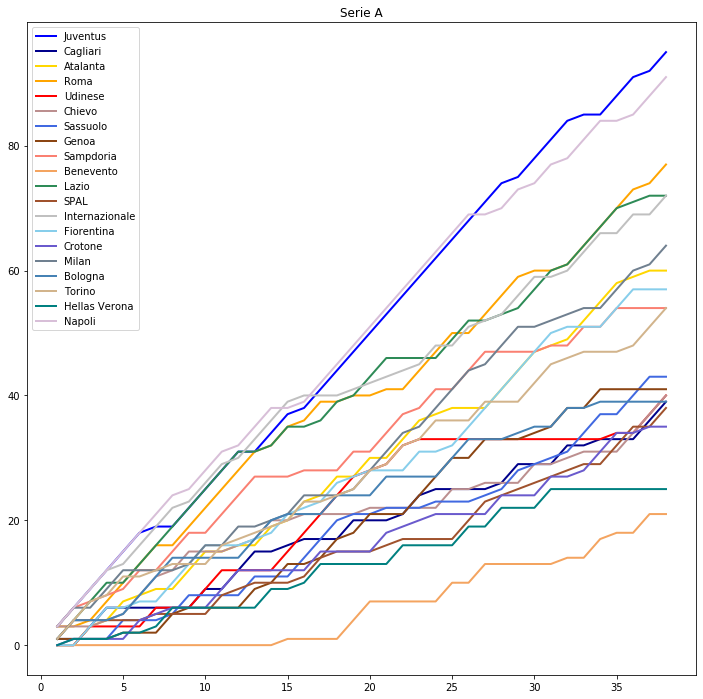

In [80]:
color_names = ['blue', 'darkblue','gold', 'orange','red','rosybrown','royalblue','saddlebrown','salmon','sandybrown',
               'seagreen','sienna','silver','skyblue','slateblue','slategray','steelblue','tan','teal','thistle',
               'tomato','turquoise','violet','wheat','white','whitesmoke','yellow','yellowgreen']


fontP = FontProperties()
fontP.set_size('medium')
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
i = 0
for key,element in dict_points.items():
    ax.plot(gameweek_list,list(element) ,c= color_names[i],ls='-',label=key, linewidth=2)
    i +=1
plt.title('Serie A')
plt.legend(prop=fontP)
plt.show()

---

## RQ2

In [81]:
# create a pandas dataframe with the teams playing at home/away
home_away = {}
for i in range(len(serie_a_matches['teamsData'])):
    home_away[i] = {}
    for x in serie_a_matches['teamsData'][i]:
        if serie_a_matches['teamsData'][i][x]['side'] == 'home':
            home_away[i].update({'home': x})
        else:
            home_away[i].update({'away': x})
home_away = pd.DataFrame(home_away).transpose()

In [82]:
# add home_away dataframe to Matches and select the columns for problem 1:
serie_a_matches_home_away = serie_a_matches.join(home_away)
subMatches = serie_a_matches_home_away[[ 'winner', 'home', 'away']]

In [83]:
#TeamL=list(set(subMatches['home']))

In [84]:
TeamL=list(set(subMatches['home']))

def TeamFrame(codeTeam):
    homeM = subMatches[(subMatches['home']==codeTeam)]
    awayM = subMatches[(subMatches['away']==codeTeam)]
    homeM_list=[]

    for i in range(len(homeM)):
        if(homeM.iloc[i]['winner']==int(homeM.iloc[i]['home'])):
            homeM_list.append('home_win')
        elif(homeM.iloc[i]['winner']==0):
            homeM_list.append('home_draw')
        else:
            homeM_list.append('home_lost')
    for i in range(len(awayM)):
        if(awayM.iloc[i]['winner']==int(awayM.iloc[i]['away'])):
            homeM_list.append('away_win')
        elif(awayM.iloc[i]['winner']==0):
            homeM_list.append('away_draw')
        else:
            homeM_list.append('away_lost')
    name = [codeTeam for i in range(38)]
    TeamFrame = pd.DataFrame(zip(name,homeM_list), columns = ['Team', 'Info'])
    
    return TeamFrame

Final = pd.concat([TeamFrame(codeTeam) for codeTeam in TeamL[-5:]])

In [85]:
Final['Team'] = pd.to_numeric(Final['Team'])

In [86]:
Final = pd.merge(Final,teams[['wyId','officialName']], left_on='Team', right_on='wyId')

In [87]:
Final = pd.crosstab(Final.officialName,Final.Info)
Final.transpose()

officialName,AC Chievo Verona,Bologna FC 1909,FC Internazionale Milano,Genoa CFC,UC Sampdoria
Info,,,,,
away_draw,4,2,7,5,3
away_lost,12,12,3,9,12
away_win,3,5,9,5,4
home_draw,6,4,5,3,3
home_lost,6,9,3,10,4
home_win,7,6,11,6,12


In [88]:
chi2_contingency(Final)

(25.282738095238088,
 0.19082755459697023,
 20,
 array([[4.2, 9.6, 5.2, 4.2, 6.4, 8.4],
        [4.2, 9.6, 5.2, 4.2, 6.4, 8.4],
        [4.2, 9.6, 5.2, 4.2, 6.4, 8.4],
        [4.2, 9.6, 5.2, 4.2, 6.4, 8.4],
        [4.2, 9.6, 5.2, 4.2, 6.4, 8.4]]))

----

## RQ3

In [89]:
# Add column 'Country' on Teams
country = pd.DataFrame([x['name'] for x in teams['area']],columns=['Country'])
teams_country = pd.merge(teams, country, left_index=True, right_index=True)
teams_england = teams_country[((teams_country['Country'] == 'Italy') & (teams_country['type'] == 'club'))]

In [90]:
# Add column 'Age' on Coaches
current_date = datetime.now().date()
age = []
for x in coaches['birthDate']:
    # because some coach doesn't have the birthDate
    try:
        age.append(int((current_date - date.fromisoformat(x)).days // 365))
    except:
        age.append(0)
age = pd.DataFrame(age, columns=['Age'], dtype=int)
coaches_age = pd.merge(coaches, age, left_index=True, right_index=True)

In [91]:
# check teams coaches in Matches and create pandas dataframe Coaches_Teams_England
teams_coaches = []
# for every matches we take the coach and put it in teams_coaches
for x in (serie_a_matches['teamsData']):
    for y in x:
        teams_coaches.append({'Team':x[y]['teamId'], 'Coach':x[y]['coachId']})
teams_coaches = pd.DataFrame(teams_coaches)

# merge coaches with teams_coaches
coaches_teams_england = pd.merge(teams_coaches, coaches_age[['currentTeamId', 'birthDate','Age','wyId']], left_on='Coach', right_on='wyId')
#merge Teams with Coaches_teams_England
coaches_teams_england = pd.merge(coaches_teams_england, teams_england[['wyId', 'officialName']], left_on='Team', right_on='wyId' )

'''
Clean DataFrame:
1) remove duplicate row
2) sort by birthDate
3) remove duplicate row with the same officialName and keep last == the youngest coach
''' 
coaches_teams_england = coaches_teams_england.drop_duplicates()
coaches_teams_england = coaches_teams_england.sort_values(by=['birthDate'])
all_coaches_teams_england = coaches_teams_england
coaches_teams_england = coaches_teams_england.drop_duplicates(subset='officialName', keep="last")

In [92]:
all_coaches_teams_england[all_coaches_teams_england['Age']>0]

,Team,Coach,currentTeamId,birthDate,Age,wyId_x,wyId_y,officialName
359,3163,210152,0,1950-08-23,69,210152,3163,Udinese Calcio
185,3172,210116,3172,1958-01-26,61,210116,3172,Atalanta Bergamasca Calcio
410,3187,210252,1610,1959-01-10,60,210252,3187,SSC Napoli
38,3161,101547,3161,1959-03-07,60,101547,3161,FC Internazionale Milano
372,3197,287082,0,1960-04-28,59,287082,3197,FC Crotone
593,3185,21155,3185,1961-10-01,58,21155,3185,Torino FC
225,3165,21603,3173,1963-07-14,56,21603,3165,AC Chievo Verona
297,3166,20481,0,1963-09-09,56,20481,3166,Bologna FC 1909
288,3219,246913,3254,1963-09-11,56,246913,3219,Benevento Calcio
630,3193,20860,0,1964-01-06,55,20860,3193,Genoa CFC


In [93]:
# Print the 10 teams with the youngest coaches
teams_young_coaches = coaches_teams_england.sort_values(by=['birthDate']).iloc[-10:]
print('\n'.join(list(teams_young_coaches['officialName'])))

AC Chievo Verona
FC Crotone
Hellas Verona FC
Genoa CFC
SS Lazio
US Sassuolo Calcio
AC Milan
Udinese Calcio
Benevento Calcio
Cagliari Calcio


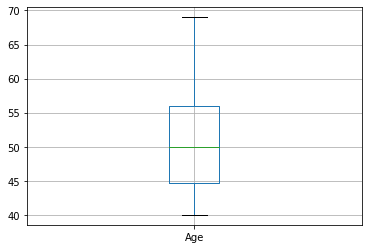

In [94]:
#Print Age boxplot
all_coaches_teams_england[all_coaches_teams_england['Age']>0].boxplot(column="Age")
plt.show()

---

## RQ4

In [95]:
# Generate England_Players DataFrame
england_teams_ID_list = list(teams_england['wyId']) # list teams Id
player_list =[]
for x in england_teams_ID_list:
    player_list.append(players[players['currentTeamId'] ==x ])

england_players = pd.concat(player_list) #DF with England Players info

In [96]:
# Generate England_Events DataFrame
england_players_ID_list = list(england_players['wyId'])
event_list =[]
for x in england_players_ID_list:
    event_list.append(serie_a_events[serie_a_events['playerId'] == x ])

england_events = pd.concat(event_list) #DF with England Events info

In [97]:
england_events_pass = england_events[england_events['eventName']=='Pass'] # sub-DataFrame with player 'passes'

In [98]:
count_total_pass = {} # dict containing the sums of pass for each player initialized to 0
count_accurate_pass = {} # dict containing the sums of accurate pass for each player initialized to 0
count_ratio_pass = {} # dict containing the ratio = count_accurate_pass/count_total_pass

# initialize
for x in england_players_ID_list:
    
    count_total_pass.update({x:0})
    count_accurate_pass.update({x:0})
    count_ratio_pass.update({x:0})

# count
i = 0
for x in england_events_pass['playerId']:

    count_total_pass[x] += 1
    if str(england_events_pass['tags'].iloc[i]).find('1801') > 0:
        count_accurate_pass[x] += 1
    i +=1    

In [99]:
n = 1000 # minimum threshold

for x in england_players_ID_list: 
    if count_total_pass[x] < n:
        del count_ratio_pass[x]
    else:
        count_ratio_pass[x] = count_accurate_pass[x] / count_total_pass[x]

In [100]:
player_pass =[x[1] for x in sorted((value,key) for (key,value) in count_ratio_pass.items())]

In [101]:
# PRINT
player_pass =[x[1] for x in sorted((value,key) for (key,value) in count_ratio_pass.items())[-10:]] # list of id players to print
for i in player_pass:
    print(players[players['wyId']==i]['shortName'].iloc[0])

L. Biglia
N. N'Koulou
B. Matuidi
A. Romagnoli
M. \u0160kriniar
K. Koulibaly
S. de Vrij
M. Benatia
D. Rugani
A. Barzagli


---

## RQ5

In [102]:
england_events_air_duel = england_events[england_events['subEventName']=='Air duel'] # sub-DataFrame with player 'passes'

In [103]:
count_total_air_duel = {} # dict containing the sums of air_duel for each player initialized to 0
count_accurate_air_duel = {} # dict containing the sums of accurate air_duel for each player initialized to 0
count_ratio_air_duel = {} # dict containing the ratio = count_accurate_air_duel/count_total_air_duel

# initialize
for x in england_players_ID_list:
    count_total_air_duel.update({x:0})
    count_accurate_air_duel.update({x:0})
    count_ratio_air_duel.update({x:0})

# count
i = 0
for x in england_events_air_duel['playerId']:
    count_total_air_duel[x] += 1
    if str(england_events_air_duel['tags'].iloc[i]).find('1801') > 0:
        count_accurate_air_duel[x] += 1
    i +=1    

In [104]:
n = 10 # minimum threshold

for x in england_players_ID_list: 
    if count_total_air_duel[x] < n:
        del count_ratio_air_duel[x]
    else:
        count_ratio_air_duel[x] = count_accurate_air_duel[x] / count_total_air_duel[x]

In [105]:
# Create player_ratio_air_duel DataFrame
lst_player = []
lst_ratio_air_duel = []
for x in count_ratio_air_duel:
    lst_player.append(x)
    lst_ratio_air_duel.append(count_ratio_air_duel[x])
player_ratio_air_duel = pd.DataFrame({'PlayersId':lst_player, 'Ratio air duel': lst_ratio_air_duel})

In [106]:
# Merge player_ratio_air_duel with England Players
air_duel_height = pd.merge(player_ratio_air_duel, england_players[['height', 'wyId', 'shortName']], left_on='PlayersId', right_on='wyId' )

In [107]:
list_id = []
list_class = []
for i in range(len(players['height'])):
    if players.iloc[i]['height'] < 160:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(150)
    elif players.iloc[i]['height'] >= 160 and players.iloc[i]['height'] < 170:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(160)
    elif players.iloc[i]['height'] >= 170 and players.iloc[i]['height'] < 175:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(170)
    elif players.iloc[i]['height'] >= 175 and players.iloc[i]['height'] < 180:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(175)
    elif players.iloc[i]['height'] >= 180 and players.iloc[i]['height'] < 185:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(180)
    elif players.iloc[i]['height'] >= 185 and players.iloc[i]['height'] < 190:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(185)
    elif players.iloc[i]['height'] >= 190 and players.iloc[i]['height'] < 195:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(190)
    elif players.iloc[i]['height'] >= 195 and players.iloc[i]['height'] < 200:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(195)
    else:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(205)

clas = pd.DataFrame(data = list_class, index = list_id, columns=['Class'])
air_duel_height_class = pd.merge(air_duel_height, clas, left_on='PlayersId', right_index=True )

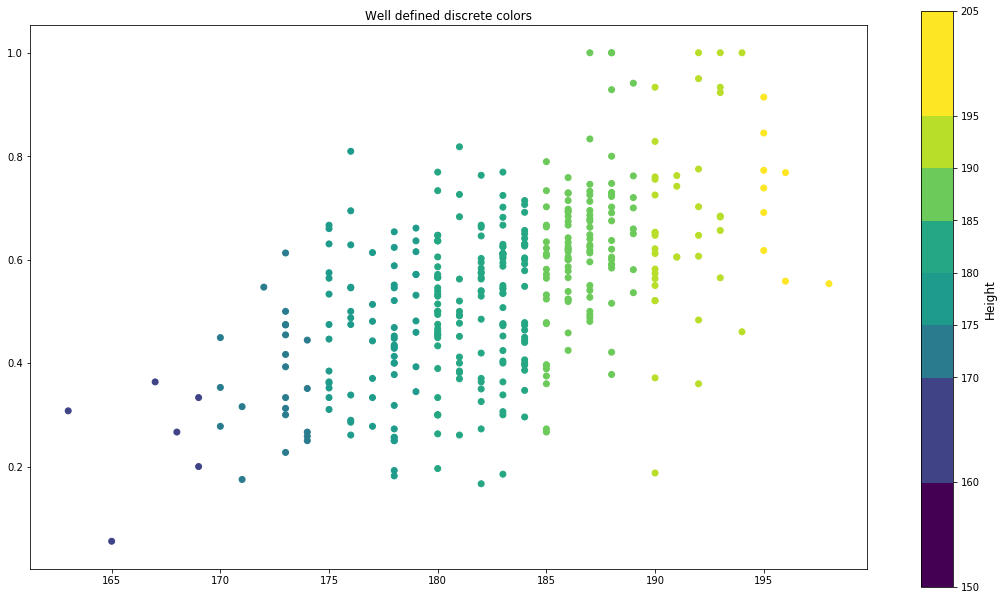

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))  # setup the plot

x = air_duel_height_class['height']  # define the data
y = air_duel_height_class['Ratio air duel']  # define the data
tag = air_duel_height_class['Class']
#tag[10:12] = 0  # make sure there are some 0 values to show up as grey

cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
#cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist=[0,1,2,3,4,5,6,7,8]
cmaplist[0] = (0.267004, 0.004874, 0.329415, 1.)
cmaplist[1] = (0.262138, 0.242286, 0.520837, 1.)
cmaplist[2] = (0.177423, 0.437527, 0.557565, 1.)
cmaplist[3] = (0.119512, 0.607464, 0.540218, 1.)
cmaplist[4] = (0.119512, 0.607464, 0.540218, 1.)
cmaplist[5] = (0.166383, 0.690856, 0.496502, 1.)
cmaplist[6] = (0.525776, 0.833491, 0.288127, 1.)
cmaplist[7] = (0.762373, 0.876424, 0.137064, 1.)
cmaplist[8] = (0.993248, 0.906157, 0.143936, 1.)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
   'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds =  np.array([150,160,170,175,180,185,190,195,205])#np.linspace(0, 5, 6)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x, y, c=tag, 
                  cmap=cmap, norm=norm)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

ax.set_title('Well defined discrete colors')
ax2.set_ylabel('Height', size=12)
plt.show()

                            OLS Regression Results                            
Dep. Variable:         Ratio air duel   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     183.2
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           2.38e-34
Time:                        22:19:48   Log-Likelihood:                 217.86
No. Observations:                 383   AIC:                            -431.7
Df Residuals:                     381   BIC:                            -423.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4787      0.223    -11.096      0.0

c:\users\ricca\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


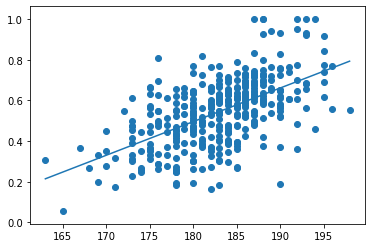

In [109]:
X = air_duel_height_class['height']  # define the data
Y = air_duel_height_class['Ratio air duel']  # define the data

results = sm.OLS(Y,sm.add_constant(X)).fit()

print(results.summary())

plt.scatter(X,Y)

X_plot = np.linspace(155,215,100)

plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)))
plt.show()

---

## RQ6

In [110]:
#with this loop we create two lists with home_team and away_team
home=[]
away=[]
for x in serie_a_matches['teamsData']:
    
    for y in x:
        d = {}
        if x[y]['side'] == 'home':
            d['home'] = y
            home.append(y)
        else:
            d['away'] = y
            away.append(y)

In [111]:
serie_a_matches_sorted_by_week = serie_a_matches.sort_values(by=['gameweek'], ascending=True) 
#sort matches by number of week 
#it is a pandas dataFrame
premier_league_by_week1 = {}
premier_league_by_week = {}

teams_list = []

gameweek_list = []
ht_goal=[]  #list to append the number of goal scored from the home team
at_goal=[]  #list to append the number of goal scored from the away team
for index, match in serie_a_matches_sorted_by_week.iterrows():
    # serie_a_matches has two main row --> index and match
    
    gameweek = match['gameweek'] #create gameweek (int) from match
    teamsData = match['teamsData'] #create teamsData dic from match
    
    
    home_id, away_id, home_score, away_score, home_points, away_points = '', '', 0,0,0,0
   
    previous_points_home, previous_points_away = 0,0
    
    for key in teamsData: #iterate key in teamsdata
        
        if teamsData[key]['side'] == 'home': #if side of the key is home, home_id is equal to key
            home_id = int(key)
            home_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
            ht_goal.append(home_score)
        else: #if side of the key is away, home_id is equal to key
            away_id = int(key)
            away_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
            at_goal.append(away_score)

In [112]:
matches_teams_VS = pd.DataFrame([list(x.keys()) for x in serie_a_matches.teamsData])
WL = pd.DataFrame({'home':home, 'away':away , 'winner':serie_a_matches.winner,'week': serie_a_matches.gameweek})
WL= WL.sort_values('week') #order based on week
WL['home_goal'] = ht_goal
WL['away_goal'] = at_goal
#WL[-10:]

In [113]:
#Function that calculate the total of goal scored (TGS) and total of goal recived (TGR)
#each team has a code ID
def Total_Goal(code):
    aaa= WL[WL['home']==str(code)]
    bbb= WL[WL['away']==str(code)]
    TGS = sum(aaa['home_goal'])+sum(bbb['away_goal'])
    TGR= sum(aaa['away_goal'])+sum(bbb['home_goal'])
    return([TGS,TGR])

In [114]:
# for loop that takes every code of Premier League's teams:
# to do that we take every matches played in the first week and we append to a list teams ID
teams_en=[]
WL[WL['week']==1]
for i in range(10):
    teams_en.append(home[i])
    teams_en.append(away[i])
#print(teams_en) #print codes 

In [115]:
#we create a for loop that uses the function to create two lists
#in the first list 'tgs' we append the total of goals scored for each team
#in the second 'tgr' the number of goals recived
tgs=[]
tgr=[]
for i in range(20):
    tgs.append(Total_Goal(teams_en[i])[0])
    tgr.append(Total_Goal(teams_en[i])[1])

In [116]:
GoalRank= pd.DataFrame(list(zip(teams_en,tgs,tgr)))
GoalRank.columns = [0, 'TGS','TGR']
GoalRank[0] = pd.to_numeric(GoalRank[0])
GoalRank = pd.merge(GoalRank,teams[['officialName','wyId']], left_on = 0, right_on = 'wyId')
GoalRank = GoalRank[['wyId', 'officialName', 'TGS', 'TGR']]
#GoalRank.head()

In [117]:
# inizialize scores
game_weeks = set(WL['week'])
teams_playing = set(WL['home'])
scores = {}
for i in game_weeks:
    scores[i] = {}
    for x in teams_playing:
        scores[i].update({x:0})

# calculate scores
for i in range(len(WL['week'])):
    if int(WL['winner'][i]) != 0:
        scores[WL['week'][i]][str(WL['winner'][i])] += 3
    else:
        scores[WL['week'][i]][str(WL['home'][i])] += 1
        scores[WL['week'][i]][str(WL['away'][i])] += 1
partial_scores = pd.DataFrame(scores)
#
for x in range(2, len(scores)+1):
    for y in scores[x]:
        scores[x][y] += scores[x-1][y]

#
scores = pd.DataFrame(scores)

In [118]:
#from the table of cumulative scores, we take the last column which is the final rank
scores1= pd.DataFrame(scores[38])
scores1.columns = [0]
scores1= scores1.sort_values(0, ascending=False)
#scores1.head()

In [119]:
#we replicate the team_ID to merge 2 different table
listcode=scores1.index
scores1['Team_ID']=listcode
#scores1.head()

In [120]:
GoalRank=GoalRank.sort_values('TGS',ascending= False)
#GoalRank.head()
#merge

In [121]:
scores1['Team_ID'] = pd.to_numeric(scores1['Team_ID'])
P1 = pd.merge(GoalRank,scores1,left_on='wyId', right_on='Team_ID')
P1 = P1.sort_values(0, ascending=False)
P1.columns= ['wyId','officialName','TGS','TGR','Points','ID']
P1.Points = range(1,21,1)
P1.columns= ['wyId','officialName','TGS','TGR','Rank','ID']
#P1

In [122]:
TGS=list(P1['TGS'])
TGR=list(P1['TGR'])
number= range(1,21)

In [123]:
rank = list(P1['wyId'])
#rank

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.01
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           8.57e-08
Time:                        22:19:50   Log-Likelihood:                -67.449
No. Observations:                  20   AIC:                             138.9
Df Residuals:                      18   BIC:                             140.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.8053      3.454      7.182      0.0

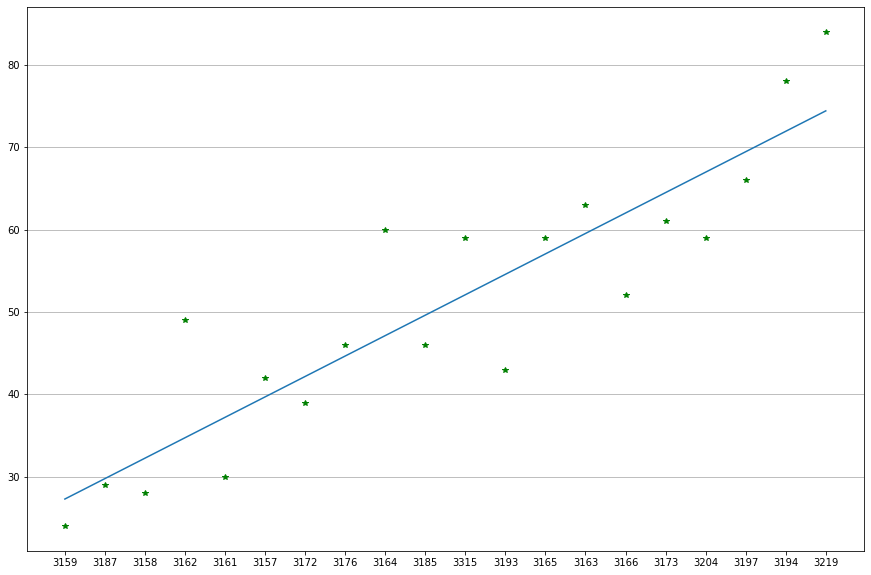

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
x = number
y = TGR
results1 = sm.OLS(y,sm.add_constant(x)).fit()

print(results1.summary())

my_xticks = rank #lista delle squadre ordinate in base al ranking
plt.xticks(x, my_xticks)
plt.plot(x, y, 'g*')
plt.grid(axis='y', linestyle='-')

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     51.93
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           1.05e-06
Time:                        22:19:50   Log-Likelihood:                -72.319
No. Observations:                  20   AIC:                             148.6
Df Residuals:                      18   BIC:                             150.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.6789      4.406     17.858      0.0

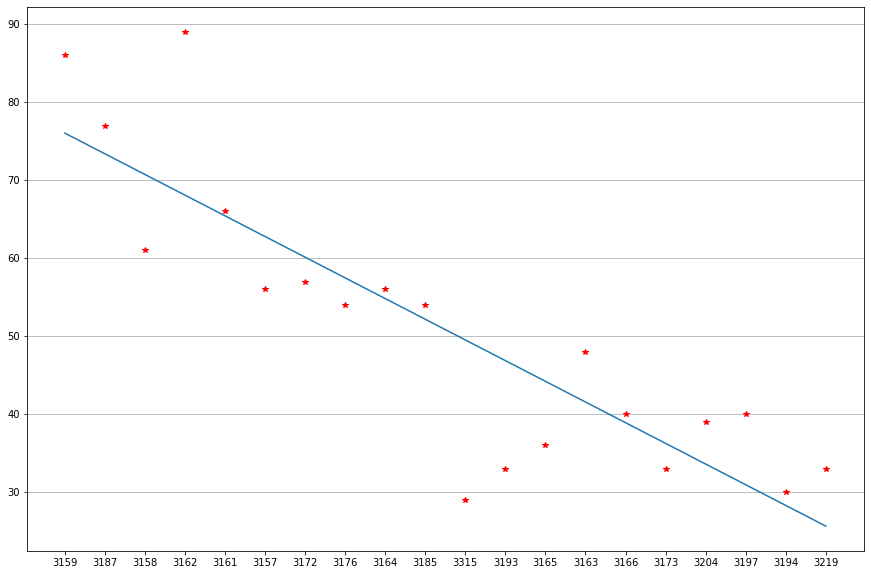

In [125]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
x = number
y1 = TGS
results2 = sm.OLS(y1,sm.add_constant(x)).fit()

print(results2.summary())

my_xticks = rank #lista delle squadre ordinate in base al ranking
plt.xticks(x, my_xticks)
plt.plot(x, y1, 'r*')
plt.grid(axis='y', linestyle='-')

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y1, 1))(np.unique(x)))
plt.show()

These figures show the linear correlation between goals and final position in rank.
Both have a high R-Squared so they are both satisfactory
The first has a higher R-squared which means that in Serie A there is a stronger correlation between goals recived and final rank's position

----

# FRANCE

## RQ1

In [126]:
ligue_1_matches_sorted_by_week = ligue_1_matches.sort_values(by=['gameweek'], ascending=True) #sort matches by number of week 
#it is a pandas dataFrame
premier_league_by_week1 = {}
premier_league_by_week = {}

teams_list = []

gameweek_list = []
for index, match in ligue_1_matches_sorted_by_week.iterrows():# ligue_1_matches has two main row --> index and match
    
    gameweek = match['gameweek'] #create gameweek (int) from match
    teamsData = match['teamsData'] #create teamsData dic from match
    
    
    home_id, away_id, home_score, away_score, home_points, away_points = '', '', 0,0,0,0
   
    previous_points_home, previous_points_away = 0,0
    
    for key in teamsData: #iterate key in teamsdata
        
        if teamsData[key]['side'] == 'home': #if side of the key is home, home_id is equal to key
            home_id = int(key)
            home_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
        else: #if side of the key is away, home_id is equal to key
            away_id = int(key)
            away_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
  

    #calculate previous points for teams of home and away
    if gameweek > 1: 
        previous_points_home = premier_league_by_week[gameweek-1][home_id]['points']
        previous_points_away = premier_league_by_week[gameweek-1][away_id]['points']
   
    #compare score to decide gaing points for teams of home and away
    if home_score > away_score: 
        home_points = 3
        away_points = 0
    elif away_score > home_score:
        home_points = 0
        away_points = 3
    else:
        home_points = 1
        away_points = 1
        
    home_name = teams[teams["wyId"] == home_id].name.values[0]  #make equale wyId to home_id and take home name
    away_name = teams[teams["wyId"] == away_id].name.values[0]  #make equale wyId to home_id and take away name
    
    if home_name not in teams_list:
        teams_list.append(home_name)
    if gameweek not in gameweek_list:
        gameweek_list.append(gameweek)
    if gameweek in premier_league_by_week:
        premier_league_by_week[gameweek][home_id] = {'team_name' : home_name, 'points' : home_points + previous_points_home }
        premier_league_by_week1[gameweek][home_name] = {'points' : home_points  }
    else:
        premier_league_by_week[gameweek] = {home_id: {'team_name' : home_name, 'points' : home_points + previous_points_home}}
        premier_league_by_week1[gameweek] = {home_name: {'points' : home_points}}
    premier_league_by_week[gameweek][away_id] = {'team_name' : away_name, 'points' : away_points + previous_points_away }
    premier_league_by_week1[gameweek][away_name] = {'points' : away_points  }
    

+ **Find first two longest winning streaks:**

In [127]:
def longestWinningStreak(teamname):
    points_list= []
    localmax =2
    totalmax= 1
    dic_name_points = {}

    for key in premier_league_by_week1:
        
        points_list.append(premier_league_by_week1[key][teamname]['points'] )

    for z in range(1,39):


        if (z<=36) and (points_list[z-1] == points_list[z] == points_list[z+1]==3):
            localmax = localmax +1
        else:
            localmax = 2
        #print('local ' , localmax)

        if localmax > totalmax:
            totalmax = localmax

        
        dic_name_points[teamname] = totalmax
    return(dic_name_points)

WinningStreakAllTeam = {}
var1 = ''
List_WinningStreakAllTeam = []
for j in range(len(teams_list)):
    WinningStreakAllTeam =longestWinningStreak(teams_list[j])
    var1 = WinningStreakAllTeam[teams_list[j]]
    #print(var1)
    List_WinningStreakAllTeam.append(str(var1))

firstMax = 0
secondMax = 0
for i in range(20):
    if (    int(List_WinningStreakAllTeam[i]) > int(firstMax) ):
        firstMax = int(List_WinningStreakAllTeam[i])
        #print(firstMax)
    elif (int(List_WinningStreakAllTeam[i]) > secondMax and int(List_WinningStreakAllTeam[i]) != firstMax ):
        secondMax = int(List_WinningStreakAllTeam[i])
        #print(secondMax)
        
#print(secondMax)
#print(firstMax)
print('First Team/Teams Of Longest Winning Streak')
for m in range(len(teams_list)):
    if(int(List_WinningStreakAllTeam[m]) == int(firstMax)):
        print(teams_list[m], firstMax)

print('Second Team/Teams Of Longest Winning Streak')
for m in range(len(teams_list)):
    if(int(List_WinningStreakAllTeam[m]) == int(secondMax)):
        print(teams_list[m], secondMax)
   

First Team/Teams Of Longest Winning Streak
PSG 9
Second Team/Teams Of Longest Winning Streak
Monaco 4
Olympique Marseille 4
Bordeaux 4
Nantes 4
Nice 4


+ **Find first two longest losing streaks:**

In [128]:
def longestLosingStreak(teamname):
    points_list= []
    localmax =2
    totalmax= 1
    dic_name_points = {}

    for key in premier_league_by_week1:
        
        points_list.append(premier_league_by_week1[key][teamname]['points'] )

    for z in range(1,39):


        if (z<=36) and (points_list[z-1] == points_list[z] == points_list[z+1]==0):
            localmax = localmax +1
        else:
            localmax = 2
        #print('local ' , localmax)

        if localmax > totalmax:
            totalmax = localmax

        
        dic_name_points[teamname] = totalmax
    return(dic_name_points)


LosingStreakAllTeam = {}
var2 = ''
List_LosingStreakAllTeam = []
for k in range(len(teams_list)):
    LosingStreakAllTeam =longestLosingStreak(teams_list[k])
    var2 = LosingStreakAllTeam[teams_list[k]]
    List_LosingStreakAllTeam.append(str(var2))
    
firstMin = 0
secondMin = 0
for i in range(20):
    if (    int(List_LosingStreakAllTeam[i]) > int(firstMin) ):
        firstMin = int(List_LosingStreakAllTeam[i])
        #print(firstMax)
    elif (int(List_LosingStreakAllTeam[i]) > secondMin and int(List_LosingStreakAllTeam[i]) != firstMin ):
        secondMin = int(List_LosingStreakAllTeam[i])

print('First Team/Teams Of Longest Losing Streak')
for m in range(len(teams_list)):
    if(int(List_LosingStreakAllTeam[m]) == int(firstMin)):
        print(teams_list[m], firstMin)

print('Second Team/Teams Of Longest Losing Streak')
for m in range(len(teams_list)):
    if(int(List_LosingStreakAllTeam[m]) == int(secondMin)):
        print(teams_list[m], secondMin)

First Team/Teams Of Longest Losing Streak
Metz 6
Second Team/Teams Of Longest Losing Streak
Amiens SC 5


+ **Create A Dictionary With All Teams And Points For All Gameweeks And Create Plot:**

In [129]:
#create a dictionary with all teams and points for all gameweeks (we need these because of show values on plot)
dict_points = {}
for index,week in premier_league_by_week.items(): #premier_league_by_week is a dic 
    for key, team in week.items():
        if index == 1:
            dict_points[team['team_name']] = [] #define key for points dic
            dict_points[team['team_name']].append(team['points']) #append points for the team
        else:
            dict_points[team['team_name']].append(team['points']) #append points for the team

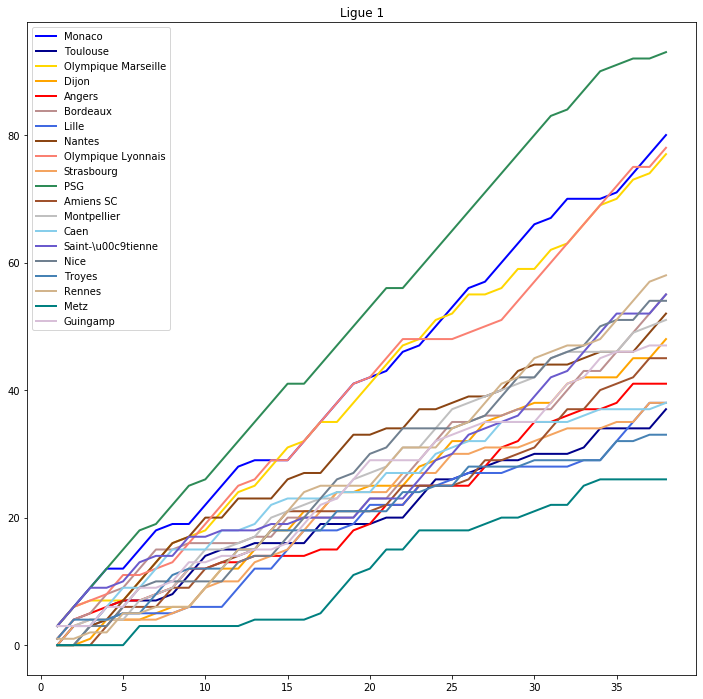

In [130]:
color_names = ['blue', 'darkblue','gold', 'orange','red','rosybrown','royalblue','saddlebrown','salmon','sandybrown',
               'seagreen','sienna','silver','skyblue','slateblue','slategray','steelblue','tan','teal','thistle',
               'tomato','turquoise','violet','wheat','white','whitesmoke','yellow','yellowgreen']


fontP = FontProperties()
fontP.set_size('medium')
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
i = 0
for key,element in dict_points.items():
    ax.plot(gameweek_list,list(element) ,c= color_names[i],ls='-',label=key, linewidth=2)
    i +=1
plt.title('Ligue 1')
plt.legend(prop=fontP)
plt.show()

---

## RQ2

In [131]:
# create a pandas dataframe with the teams playing at home/away
home_away = {}
for i in range(len(ligue_1_matches['teamsData'])):
    home_away[i] = {}
    for x in ligue_1_matches['teamsData'][i]:
        if ligue_1_matches['teamsData'][i][x]['side'] == 'home':
            home_away[i].update({'home': x})
        else:
            home_away[i].update({'away': x})
home_away = pd.DataFrame(home_away).transpose()

In [132]:
# add home_away dataframe to Matches and select the columns for problem 1:
ligue_1_matches_home_away = ligue_1_matches.join(home_away)
subMatches = ligue_1_matches_home_away[[ 'winner', 'home', 'away']]

In [133]:
#TeamL=list(set(subMatches['home']))

In [134]:
TeamL=list(set(subMatches['home']))

def TeamFrame(codeTeam):
    homeM = subMatches[(subMatches['home']==codeTeam)]
    awayM = subMatches[(subMatches['away']==codeTeam)]
    homeM_list=[]

    for i in range(len(homeM)):
        if(homeM.iloc[i]['winner']==int(homeM.iloc[i]['home'])):
            homeM_list.append('home_win')
        elif(homeM.iloc[i]['winner']==0):
            homeM_list.append('home_draw')
        else:
            homeM_list.append('home_lost')
    for i in range(len(awayM)):
        if(awayM.iloc[i]['winner']==int(awayM.iloc[i]['away'])):
            homeM_list.append('away_win')
        elif(awayM.iloc[i]['winner']==0):
            homeM_list.append('away_draw')
        else:
            homeM_list.append('away_lost')
    name = [codeTeam for i in range(38)]
    TeamFrame = pd.DataFrame(zip(name,homeM_list), columns = ['Team', 'Info'])
    
    return TeamFrame

Final = pd.concat([TeamFrame(codeTeam) for codeTeam in TeamL[-5:]])

In [135]:
Final['Team'] = pd.to_numeric(Final['Team'])

In [136]:
Final = pd.merge(Final,teams[['wyId','officialName']], left_on='Team', right_on='wyId')

In [137]:
Final = pd.crosstab(Final.officialName,Final.Info)
Final.transpose()

officialName,AS Monaco FC,Amiens SC,FC Metz,RC Strasbourg Alsace,Toulouse FC
Info,,,,,
away_draw,5,4,4,5,5
away_lost,5,11,12,12,12
away_win,9,4,3,2,2
home_draw,3,5,4,6,5
home_lost,1,6,12,6,7
home_win,15,8,3,7,7


In [138]:
chi2_contingency(Final)

(32.530727424749166,
 0.03796118469656619,
 20,
 array([[ 4.6, 10.4,  4. ,  4.6,  6.4,  8. ],
        [ 4.6, 10.4,  4. ,  4.6,  6.4,  8. ],
        [ 4.6, 10.4,  4. ,  4.6,  6.4,  8. ],
        [ 4.6, 10.4,  4. ,  4.6,  6.4,  8. ],
        [ 4.6, 10.4,  4. ,  4.6,  6.4,  8. ]]))

----

## RQ3

In [139]:
# Add column 'Country' on Teams
country = pd.DataFrame([x['name'] for x in teams['area']],columns=['Country'])
teams_country = pd.merge(teams, country, left_index=True, right_index=True)
teams_england = teams_country[((teams_country['Country'] == 'France') & (teams_country['type'] == 'club'))]

In [140]:
# Add column 'Age' on Coaches
current_date = datetime.now().date()
age = []
for x in coaches['birthDate']:
    # because some coach doesn't have the birthDate
    try:
        age.append(int((current_date - date.fromisoformat(x)).days // 365))
    except:
        age.append(0)
age = pd.DataFrame(age, columns=['Age'], dtype=int)
coaches_age = pd.merge(coaches, age, left_index=True, right_index=True)

In [141]:
# check teams coaches in Matches and create pandas dataframe Coaches_Teams_England
teams_coaches = []
# for every matches we take the coach and put it in teams_coaches
for x in (ligue_1_matches['teamsData']):
    for y in x:
        teams_coaches.append({'Team':x[y]['teamId'], 'Coach':x[y]['coachId']})
teams_coaches = pd.DataFrame(teams_coaches)

# merge coaches with teams_coaches
coaches_teams_england = pd.merge(teams_coaches, coaches_age[['currentTeamId', 'birthDate','Age','wyId']], left_on='Coach', right_on='wyId')
#merge Teams with Coaches_teams_England
coaches_teams_england = pd.merge(coaches_teams_england, teams_england[['wyId', 'officialName']], left_on='Team', right_on='wyId' )

'''
Clean DataFrame:
1) remove duplicate row
2) sort by birthDate
3) remove duplicate row with the same officialName and keep last == the youngest coach
''' 
coaches_teams_england = coaches_teams_england.drop_duplicates()
coaches_teams_england = coaches_teams_england.sort_values(by=['birthDate'])
all_coaches_teams_england = coaches_teams_england
coaches_teams_england = coaches_teams_england.drop_duplicates(subset='officialName', keep="last")

In [142]:
all_coaches_teams_england[all_coaches_teams_england['Age']>0]

,Team,Coach,currentTeamId,birthDate,Age,wyId_x,wyId_y,officialName
392,3770,20508,3158,1951-10-20,68,20508,3770,FC Nantes
498,3782,270285,3782,1953-12-09,65,270285,3782,AS Saint-\u00c9tienne
486,3774,26012,16444,1955-04-05,64,26012,3774,Stade Rennais FC
549,3776,3396,1630,1955-07-21,64,3396,3776,Lille OSC M\u00e9tropole
178,3775,15005,2447,1957-11-02,62,15005,3775,O.G.C. Nice C\u00f4te d'Azur
347,3777,26272,3798,1959-11-19,59,26272,3777,FC Metz
0,3783,210513,0,1960-11-27,58,210513,3783,Stade Malherbe Caen
583,3780,228969,0,1962-09-19,57,228969,3780,Toulouse FC
639,3795,25606,0,1962-09-20,57,25606,3795,Esp\u00e9rance Sportive Troyes Aube Champagne
427,3787,26213,3787,1963-02-18,56,26213,3787,Montpellier HSC


In [143]:
# Print the 10 teams with the youngest coaches
teams_young_coaches = coaches_teams_england.sort_values(by=['birthDate']).iloc[-10:]
print('\n'.join(list(teams_young_coaches['officialName'])))

Amiens SC
FC Metz
Olympique Lyonnais
Angers SCO
Toulouse FC
Paris Saint-Germain FC
Stade Rennais FC
FC Girondins de Bordeaux
AS Saint-\u00c9tienne
Lille OSC M\u00e9tropole


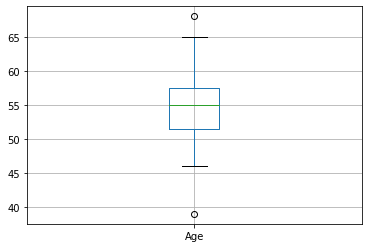

In [144]:
#Print Age boxplot
all_coaches_teams_england[all_coaches_teams_england['Age']>0].boxplot(column="Age")
plt.show()

---

## RQ4

In [145]:
# Generate England_Players DataFrame
england_teams_ID_list = list(teams_england['wyId']) # list teams Id
player_list =[]
for x in england_teams_ID_list:
    player_list.append(players[players['currentTeamId'] ==x ])

england_players = pd.concat(player_list) #DF with England Players info

In [146]:
# Generate England_Events DataFrame
england_players_ID_list = list(england_players['wyId'])
event_list =[]
for x in england_players_ID_list:
    event_list.append(ligue_1_events[ligue_1_events['playerId'] == x ])

england_events = pd.concat(event_list) #DF with England Events info

In [147]:
england_events_pass = england_events[england_events['eventName']=='Pass'] # sub-DataFrame with player 'passes'

In [148]:
count_total_pass = {} # dict containing the sums of pass for each player initialized to 0
count_accurate_pass = {} # dict containing the sums of accurate pass for each player initialized to 0
count_ratio_pass = {} # dict containing the ratio = count_accurate_pass/count_total_pass

# initialize
for x in england_players_ID_list:
    
    count_total_pass.update({x:0})
    count_accurate_pass.update({x:0})
    count_ratio_pass.update({x:0})

# count
i = 0
for x in england_events_pass['playerId']:

    count_total_pass[x] += 1
    if str(england_events_pass['tags'].iloc[i]).find('1801') > 0:
        count_accurate_pass[x] += 1
    i +=1    

In [149]:
n = 1000 # minimum threshold

for x in england_players_ID_list: 
    if count_total_pass[x] < n:
        del count_ratio_pass[x]
    else:
        count_ratio_pass[x] = count_accurate_pass[x] / count_total_pass[x]

In [150]:
player_pass =[x[1] for x in sorted((value,key) for (key,value) in count_ratio_pass.items())]

In [151]:
# PRINT
player_pass =[x[1] for x in sorted((value,key) for (key,value) in count_ratio_pass.items())[-10:]] # list of id players to print
for i in player_pass:
    print(players[players['wyId']==i]['shortName'].iloc[0])

M. Lopez
J. Draxler
J. Gnagnon
A. Tameze
Dante
A. Rabiot
Marquinhos
P. Kimpembe
Thiago Silva
Marlon


---

## RQ5

In [152]:
england_events_air_duel = england_events[england_events['subEventName']=='Air duel'] # sub-DataFrame with player 'passes'

In [153]:
count_total_air_duel = {} # dict containing the sums of air_duel for each player initialized to 0
count_accurate_air_duel = {} # dict containing the sums of accurate air_duel for each player initialized to 0
count_ratio_air_duel = {} # dict containing the ratio = count_accurate_air_duel/count_total_air_duel

# initialize
for x in england_players_ID_list:
    count_total_air_duel.update({x:0})
    count_accurate_air_duel.update({x:0})
    count_ratio_air_duel.update({x:0})

# count
i = 0
for x in england_events_air_duel['playerId']:
    count_total_air_duel[x] += 1
    if str(england_events_air_duel['tags'].iloc[i]).find('1801') > 0:
        count_accurate_air_duel[x] += 1
    i +=1    

In [154]:
n = 10 # minimum threshold

for x in england_players_ID_list: 
    if count_total_air_duel[x] < n:
        del count_ratio_air_duel[x]
    else:
        count_ratio_air_duel[x] = count_accurate_air_duel[x] / count_total_air_duel[x]

In [155]:
# Create player_ratio_air_duel DataFrame
lst_player = []
lst_ratio_air_duel = []
for x in count_ratio_air_duel:
    lst_player.append(x)
    lst_ratio_air_duel.append(count_ratio_air_duel[x])
player_ratio_air_duel = pd.DataFrame({'PlayersId':lst_player, 'Ratio air duel': lst_ratio_air_duel})

In [156]:
# Merge player_ratio_air_duel with England Players
air_duel_height = pd.merge(player_ratio_air_duel, england_players[['height', 'wyId', 'shortName']], left_on='PlayersId', right_on='wyId' )

In [157]:
list_id = []
list_class = []
for i in range(len(players['height'])):
    if players.iloc[i]['height'] < 160:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(150)
    elif players.iloc[i]['height'] >= 160 and players.iloc[i]['height'] < 170:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(160)
    elif players.iloc[i]['height'] >= 170 and players.iloc[i]['height'] < 175:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(170)
    elif players.iloc[i]['height'] >= 175 and players.iloc[i]['height'] < 180:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(175)
    elif players.iloc[i]['height'] >= 180 and players.iloc[i]['height'] < 185:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(180)
    elif players.iloc[i]['height'] >= 185 and players.iloc[i]['height'] < 190:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(185)
    elif players.iloc[i]['height'] >= 190 and players.iloc[i]['height'] < 195:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(190)
    elif players.iloc[i]['height'] >= 195 and players.iloc[i]['height'] < 200:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(195)
    else:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(205)

clas = pd.DataFrame(data = list_class, index = list_id, columns=['Class'])
air_duel_height_class = pd.merge(air_duel_height, clas, left_on='PlayersId', right_index=True )

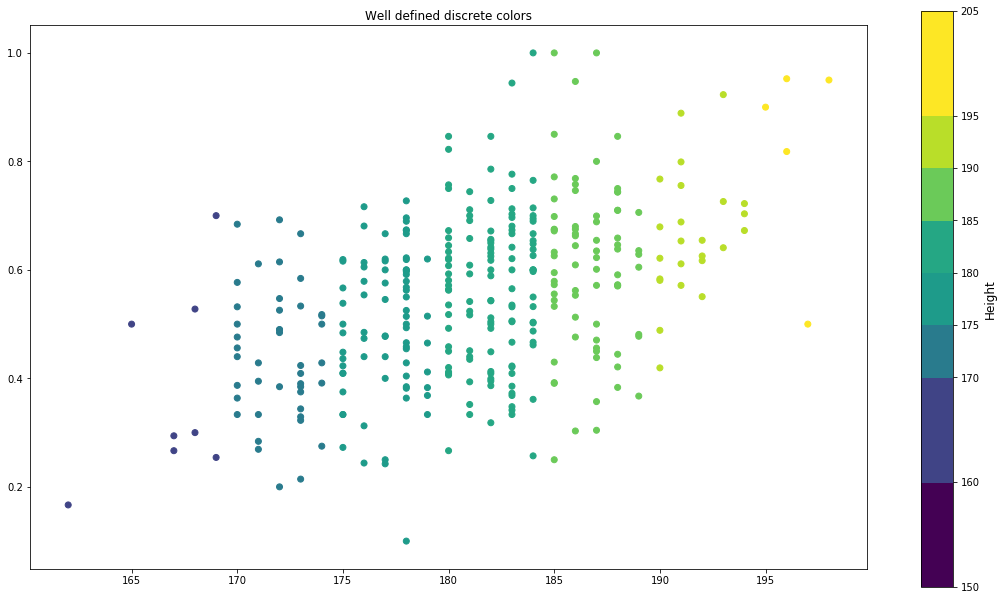

In [158]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))  # setup the plot

x = air_duel_height_class['height']  # define the data
y = air_duel_height_class['Ratio air duel']  # define the data
tag = air_duel_height_class['Class']
#tag[10:12] = 0  # make sure there are some 0 values to show up as grey

cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
#cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist=[0,1,2,3,4,5,6,7,8]
cmaplist[0] = (0.267004, 0.004874, 0.329415, 1.)
cmaplist[1] = (0.262138, 0.242286, 0.520837, 1.)
cmaplist[2] = (0.177423, 0.437527, 0.557565, 1.)
cmaplist[3] = (0.119512, 0.607464, 0.540218, 1.)
cmaplist[4] = (0.119512, 0.607464, 0.540218, 1.)
cmaplist[5] = (0.166383, 0.690856, 0.496502, 1.)
cmaplist[6] = (0.525776, 0.833491, 0.288127, 1.)
cmaplist[7] = (0.762373, 0.876424, 0.137064, 1.)
cmaplist[8] = (0.993248, 0.906157, 0.143936, 1.)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
   'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds =  np.array([150,160,170,175,180,185,190,195,205])#np.linspace(0, 5, 6)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x, y, c=tag, 
                  cmap=cmap, norm=norm)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

ax.set_title('Well defined discrete colors')
ax2.set_ylabel('Height', size=12)
plt.show()

                            OLS Regression Results                            
Dep. Variable:         Ratio air duel   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     93.70
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           9.06e-20
Time:                        22:20:08   Log-Likelihood:                 194.88
No. Observations:                 348   AIC:                            -385.8
Df Residuals:                     346   BIC:                            -378.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5585      0.218     -7.144      0.0

c:\users\ricca\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


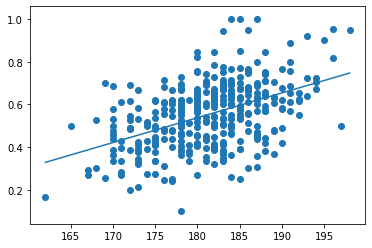

In [159]:
X = air_duel_height_class['height']  # define the data
Y = air_duel_height_class['Ratio air duel']  # define the data

results = sm.OLS(Y,sm.add_constant(X)).fit()

print(results.summary())

plt.scatter(X,Y)

X_plot = np.linspace(155,215,100)

plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)))
plt.show()

---

## RQ6

In [160]:
#with this loop we create two lists with home_team and away_team
home=[]
away=[]
for x in ligue_1_matches['teamsData']:
    
    for y in x:
        d = {}
        if x[y]['side'] == 'home':
            d['home'] = y
            home.append(y)
        else:
            d['away'] = y
            away.append(y)

In [161]:
ligue_1_matches_sorted_by_week = ligue_1_matches.sort_values(by=['gameweek'], ascending=True) 
#sort matches by number of week 
#it is a pandas dataFrame
premier_league_by_week1 = {}
premier_league_by_week = {}

teams_list = []

gameweek_list = []
ht_goal=[]  #list to append the number of goal scored from the home team
at_goal=[]  #list to append the number of goal scored from the away team
for index, match in ligue_1_matches_sorted_by_week.iterrows():
    # ligue_1_matches has two main row --> index and match
    
    gameweek = match['gameweek'] #create gameweek (int) from match
    teamsData = match['teamsData'] #create teamsData dic from match
    
    
    home_id, away_id, home_score, away_score, home_points, away_points = '', '', 0,0,0,0
   
    previous_points_home, previous_points_away = 0,0
    
    for key in teamsData: #iterate key in teamsdata
        
        if teamsData[key]['side'] == 'home': #if side of the key is home, home_id is equal to key
            home_id = int(key)
            home_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
            ht_goal.append(home_score)
        else: #if side of the key is away, home_id is equal to key
            away_id = int(key)
            away_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
            at_goal.append(away_score)

In [162]:
matches_teams_VS = pd.DataFrame([list(x.keys()) for x in ligue_1_matches.teamsData])
WL = pd.DataFrame({'home':home, 'away':away , 'winner':ligue_1_matches.winner,'week': ligue_1_matches.gameweek})
WL= WL.sort_values('week') #order based on week
WL['home_goal'] = ht_goal
WL['away_goal'] = at_goal
#WL[-10:]

In [163]:
#Function that calculate the total of goal scored (TGS) and total of goal recived (TGR)
#each team has a code ID
def Total_Goal(code):
    aaa= WL[WL['home']==str(code)]
    bbb= WL[WL['away']==str(code)]
    TGS = sum(aaa['home_goal'])+sum(bbb['away_goal'])
    TGR= sum(aaa['away_goal'])+sum(bbb['home_goal'])
    return([TGS,TGR])

In [164]:
# for loop that takes every code of Premier League's teams:
# to do that we take every matches played in the first week and we append to a list teams ID
teams_en=[]
WL[WL['week']==1]
for i in range(10):
    teams_en.append(home[i])
    teams_en.append(away[i])
#print(teams_en) #print codes 

In [165]:
#we create a for loop that uses the function to create two lists
#in the first list 'tgs' we append the total of goals scored for each team
#in the second 'tgr' the number of goals recived
tgs=[]
tgr=[]
for i in range(20):
    tgs.append(Total_Goal(teams_en[i])[0])
    tgr.append(Total_Goal(teams_en[i])[1])

In [166]:
GoalRank= pd.DataFrame(list(zip(teams_en,tgs,tgr)))
GoalRank.columns = [0, 'TGS','TGR']
GoalRank[0] = pd.to_numeric(GoalRank[0])
GoalRank = pd.merge(GoalRank,teams[['officialName','wyId']], left_on = 0, right_on = 'wyId')
GoalRank = GoalRank[['wyId', 'officialName', 'TGS', 'TGR']]
#GoalRank.head()

In [167]:
# inizialize scores
game_weeks = set(WL['week'])
teams_playing = set(WL['home'])
scores = {}
for i in game_weeks:
    scores[i] = {}
    for x in teams_playing:
        scores[i].update({x:0})

# calculate scores
for i in range(len(WL['week'])):
    if int(WL['winner'][i]) != 0:
        scores[WL['week'][i]][str(WL['winner'][i])] += 3
    else:
        scores[WL['week'][i]][str(WL['home'][i])] += 1
        scores[WL['week'][i]][str(WL['away'][i])] += 1
partial_scores = pd.DataFrame(scores)
#
for x in range(2, len(scores)+1):
    for y in scores[x]:
        scores[x][y] += scores[x-1][y]

#
scores = pd.DataFrame(scores)

In [168]:
#from the table of cumulative scores, we take the last column which is the final rank
scores1= pd.DataFrame(scores[38])
scores1.columns = [0]
scores1= scores1.sort_values(0, ascending=False)
#scores1.head()

In [169]:
#we replicate the team_ID to merge 2 different table
listcode=scores1.index
scores1['Team_ID']=listcode
#scores1.head()

In [170]:
GoalRank=GoalRank.sort_values('TGS',ascending= False)
#GoalRank.head()
#merge

In [171]:
scores1['Team_ID'] = pd.to_numeric(scores1['Team_ID'])
P1 = pd.merge(GoalRank,scores1,left_on='wyId', right_on='Team_ID')
P1 = P1.sort_values(0, ascending=False)
P1.columns= ['wyId','officialName','TGS','TGR','Points','ID']
P1.Points = range(1,21,1)
P1.columns= ['wyId','officialName','TGS','TGR','Rank','ID']
#P1

In [172]:
TGS=list(P1['TGS'])
TGR=list(P1['TGR'])
number= range(1,21)

In [173]:
rank = list(P1['wyId'])
#rank

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     15.27
Date:                Wed, 30 Oct 2019   Prob (F-statistic):            0.00103
Time:                        22:20:09   Log-Likelihood:                -72.060
No. Observations:                  20   AIC:                             148.1
Df Residuals:                      18   BIC:                             150.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.7526      4.349      8.450      0.0

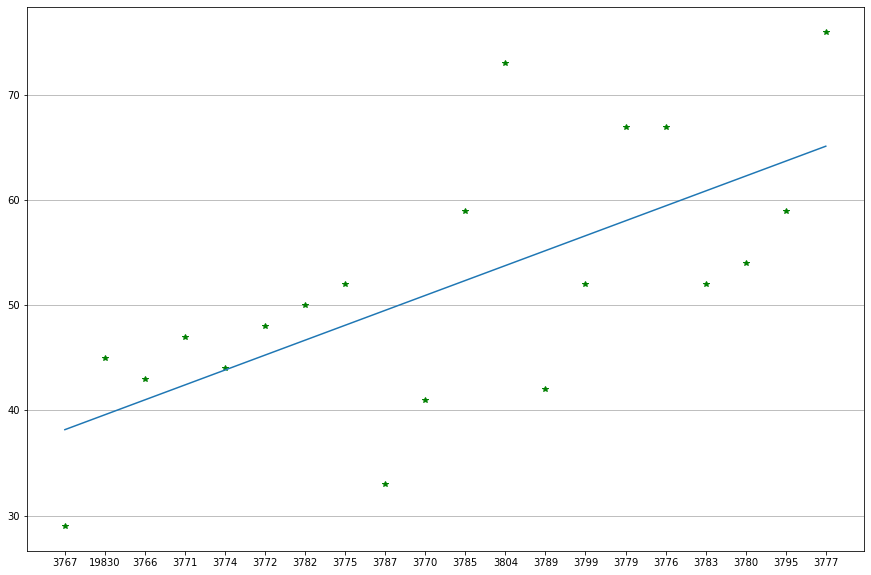

In [174]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
x = number
y = TGR
results1 = sm.OLS(y,sm.add_constant(x)).fit()

print(results1.summary())

my_xticks = rank #lista delle squadre ordinate in base al ranking
plt.xticks(x, my_xticks)
plt.plot(x, y, 'g*')
plt.grid(axis='y', linestyle='-')

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     35.70
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           1.19e-05
Time:                        22:20:09   Log-Likelihood:                -78.378
No. Observations:                  20   AIC:                             160.8
Df Residuals:                      18   BIC:                             162.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.8895      5.965     13.896      0.0

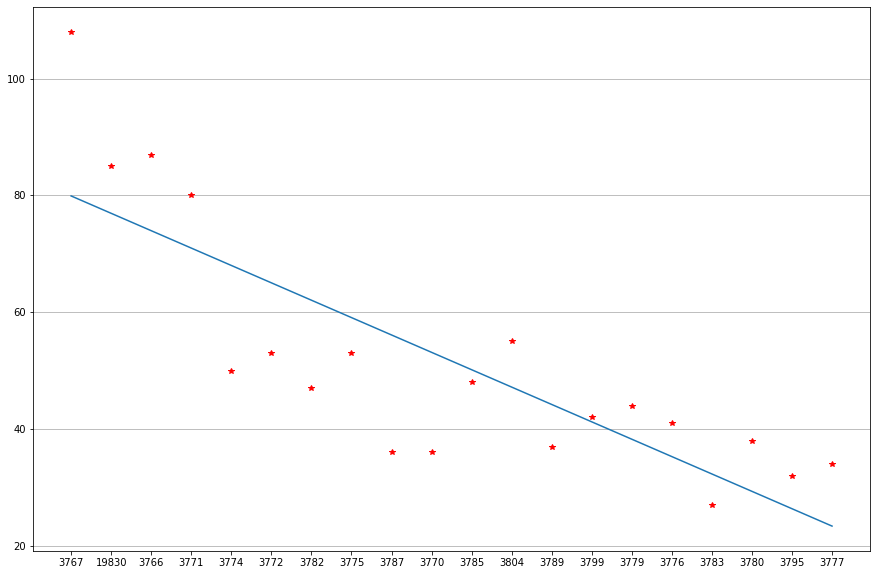

In [175]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
x = number
y1 = TGS
results2 = sm.OLS(y1,sm.add_constant(x)).fit()

print(results2.summary())

my_xticks = rank #lista delle squadre ordinate in base al ranking
plt.xticks(x, my_xticks)
plt.plot(x, y1, 'r*')
plt.grid(axis='y', linestyle='-')

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y1, 1))(np.unique(x)))
plt.show()

These figures show the linear correlation between goals and final position in rank.
Both have a high R-Squared so they are both satisfactory
The second has a higher R-squared which means that in League 1 there is a stronger correlation between goals scored and final rank's position

----

## SPAIN

## RQ1

In [176]:
laliga_matches_sorted_by_week = laliga_matches.sort_values(by=['gameweek'], ascending=True) #sort matches by number of week 
#it is a pandas dataFrame
premier_league_by_week1 = {}
premier_league_by_week = {}

teams_list = []

gameweek_list = []
for index, match in laliga_matches_sorted_by_week.iterrows():# laliga_matches has two main row --> index and match
    
    gameweek = match['gameweek'] #create gameweek (int) from match
    teamsData = match['teamsData'] #create teamsData dic from match
    
    
    home_id, away_id, home_score, away_score, home_points, away_points = '', '', 0,0,0,0
   
    previous_points_home, previous_points_away = 0,0
    
    for key in teamsData: #iterate key in teamsdata
        
        if teamsData[key]['side'] == 'home': #if side of the key is home, home_id is equal to key
            home_id = int(key)
            home_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
        else: #if side of the key is away, home_id is equal to key
            away_id = int(key)
            away_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
  

    #calculate previous points for teams of home and away
    if gameweek > 1: 
        previous_points_home = premier_league_by_week[gameweek-1][home_id]['points']
        previous_points_away = premier_league_by_week[gameweek-1][away_id]['points']
   
    #compare score to decide gaing points for teams of home and away
    if home_score > away_score: 
        home_points = 3
        away_points = 0
    elif away_score > home_score:
        home_points = 0
        away_points = 3
    else:
        home_points = 1
        away_points = 1
        
    home_name = teams[teams["wyId"] == home_id].name.values[0]  #make equale wyId to home_id and take home name
    away_name = teams[teams["wyId"] == away_id].name.values[0]  #make equale wyId to home_id and take away name
    
    if home_name not in teams_list:
        teams_list.append(home_name)
    if gameweek not in gameweek_list:
        gameweek_list.append(gameweek)
    if gameweek in premier_league_by_week:
        premier_league_by_week[gameweek][home_id] = {'team_name' : home_name, 'points' : home_points + previous_points_home }
        premier_league_by_week1[gameweek][home_name] = {'points' : home_points  }
    else:
        premier_league_by_week[gameweek] = {home_id: {'team_name' : home_name, 'points' : home_points + previous_points_home}}
        premier_league_by_week1[gameweek] = {home_name: {'points' : home_points}}
    premier_league_by_week[gameweek][away_id] = {'team_name' : away_name, 'points' : away_points + previous_points_away }
    premier_league_by_week1[gameweek][away_name] = {'points' : away_points  }
    

+ **Find first two longest winning streaks:**

In [177]:
def longestWinningStreak(teamname):
    points_list= []
    localmax =2
    totalmax= 1
    dic_name_points = {}

    for key in premier_league_by_week1:
        
        points_list.append(premier_league_by_week1[key][teamname]['points'] )

    for z in range(1,39):


        if (z<=36) and (points_list[z-1] == points_list[z] == points_list[z+1]==3):
            localmax = localmax +1
        else:
            localmax = 2
        #print('local ' , localmax)

        if localmax > totalmax:
            totalmax = localmax

        
        dic_name_points[teamname] = totalmax
    return(dic_name_points)

WinningStreakAllTeam = {}
var1 = ''
List_WinningStreakAllTeam = []
for j in range(len(teams_list)):
    WinningStreakAllTeam =longestWinningStreak(teams_list[j])
    var1 = WinningStreakAllTeam[teams_list[j]]
    #print(var1)
    List_WinningStreakAllTeam.append(str(var1))

firstMax = 0
secondMax = 0
for i in range(20):
    if (    int(List_WinningStreakAllTeam[i]) > int(firstMax) ):
        firstMax = int(List_WinningStreakAllTeam[i])
        #print(firstMax)
    elif (int(List_WinningStreakAllTeam[i]) > secondMax and int(List_WinningStreakAllTeam[i]) != firstMax ):
        secondMax = int(List_WinningStreakAllTeam[i])
        #print(secondMax)
        
#print(secondMax)
#print(firstMax)
print('First Team/Teams Of Longest Winning Streak')
for m in range(len(teams_list)):
    if(int(List_WinningStreakAllTeam[m]) == int(firstMax)):
        print(teams_list[m], firstMax)

print('Second Team/Teams Of Longest Winning Streak')
for m in range(len(teams_list)):
    if(int(List_WinningStreakAllTeam[m]) == int(secondMax)):
        print(teams_list[m], secondMax)
   

First Team/Teams Of Longest Winning Streak
Valencia 8
Second Team/Teams Of Longest Winning Streak
Real Betis 6
Atl\u00e9tico Madrid 6


+ **Find first two longest losing streaks:**

In [178]:
def longestLosingStreak(teamname):
    points_list= []
    localmax =2
    totalmax= 1
    dic_name_points = {}

    for key in premier_league_by_week1:
        
        points_list.append(premier_league_by_week1[key][teamname]['points'] )

    for z in range(1,39):


        if (z<=36) and (points_list[z-1] == points_list[z] == points_list[z+1]==0):
            localmax = localmax +1
        else:
            localmax = 2
        #print('local ' , localmax)

        if localmax > totalmax:
            totalmax = localmax

        
        dic_name_points[teamname] = totalmax
    return(dic_name_points)


LosingStreakAllTeam = {}
var2 = ''
List_LosingStreakAllTeam = []
for k in range(len(teams_list)):
    LosingStreakAllTeam =longestLosingStreak(teams_list[k])
    var2 = LosingStreakAllTeam[teams_list[k]]
    List_LosingStreakAllTeam.append(str(var2))
    
firstMin = 0
secondMin = 0
for i in range(20):
    if (    int(List_LosingStreakAllTeam[i]) > int(firstMin) ):
        firstMin = int(List_LosingStreakAllTeam[i])
        #print(firstMax)
    elif (int(List_LosingStreakAllTeam[i]) > secondMin and int(List_LosingStreakAllTeam[i]) != firstMin ):
        secondMin = int(List_LosingStreakAllTeam[i])

print('First Team/Teams Of Longest Losing Streak')
for m in range(len(teams_list)):
    if(int(List_LosingStreakAllTeam[m]) == int(firstMin)):
        print(teams_list[m], firstMin)

print('Second Team/Teams Of Longest Losing Streak')
for m in range(len(teams_list)):
    if(int(List_LosingStreakAllTeam[m]) == int(secondMin)):
        print(teams_list[m], secondMin)

First Team/Teams Of Longest Losing Streak
Las Palmas 8
Second Team/Teams Of Longest Losing Streak
Deportivo Alav\u00e9s 6


+ **Create A Dictionary With All Teams And Points For All Gameweeks And Create Plot:**

In [179]:
#create a dictionary with all teams and points for all gameweeks (we need these because of show values on plot)
dict_points = {}
for index,week in premier_league_by_week.items(): #premier_league_by_week is a dic 
    for key, team in week.items():
        if index == 1:
            dict_points[team['team_name']] = [] #define key for points dic
            dict_points[team['team_name']].append(team['points']) #append points for the team
        else:
            dict_points[team['team_name']].append(team['points']) #append points for the team

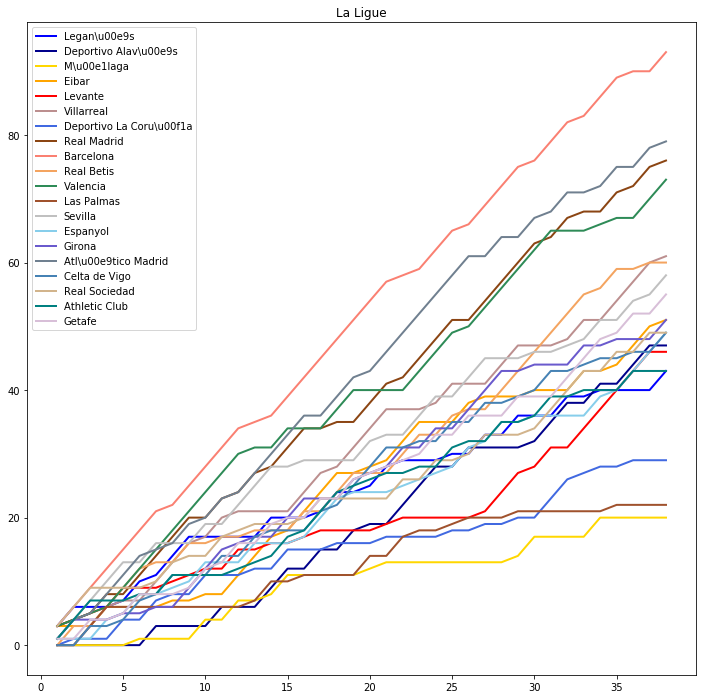

In [180]:
color_names = ['blue', 'darkblue','gold', 'orange','red','rosybrown','royalblue','saddlebrown','salmon','sandybrown',
               'seagreen','sienna','silver','skyblue','slateblue','slategray','steelblue','tan','teal','thistle',
               'tomato','turquoise','violet','wheat','white','whitesmoke','yellow','yellowgreen']


fontP = FontProperties()
fontP.set_size('medium')
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
i = 0
for key,element in dict_points.items():
    ax.plot(gameweek_list,list(element) ,c= color_names[i],ls='-',label=key, linewidth=2)
    i +=1
plt.title('La Ligue')
plt.legend(prop=fontP)
plt.show()

---

## RQ2

In [181]:
# create a pandas dataframe with the teams playing at home/away
home_away = {}
for i in range(len(laliga_matches['teamsData'])):
    home_away[i] = {}
    for x in laliga_matches['teamsData'][i]:
        if laliga_matches['teamsData'][i][x]['side'] == 'home':
            home_away[i].update({'home': x})
        else:
            home_away[i].update({'away': x})
home_away = pd.DataFrame(home_away).transpose()

In [182]:
# add home_away dataframe to Matches and select the columns for problem 1:
laliga_matches_home_away = laliga_matches.join(home_away)
subMatches = laliga_matches_home_away[[ 'winner', 'home', 'away']]

In [183]:
#TeamL=list(set(subMatches['home']))

In [184]:
TeamL=list(set(subMatches['home']))

def TeamFrame(codeTeam):
    homeM = subMatches[(subMatches['home']==codeTeam)]
    awayM = subMatches[(subMatches['away']==codeTeam)]
    homeM_list=[]

    for i in range(len(homeM)):
        if(homeM.iloc[i]['winner']==int(homeM.iloc[i]['home'])):
            homeM_list.append('home_win')
        elif(homeM.iloc[i]['winner']==0):
            homeM_list.append('home_draw')
        else:
            homeM_list.append('home_lost')
    for i in range(len(awayM)):
        if(awayM.iloc[i]['winner']==int(awayM.iloc[i]['away'])):
            homeM_list.append('away_win')
        elif(awayM.iloc[i]['winner']==0):
            homeM_list.append('away_draw')
        else:
            homeM_list.append('away_lost')
    name = [codeTeam for i in range(38)]
    TeamFrame = pd.DataFrame(zip(name,homeM_list), columns = ['Team', 'Info'])
    
    return TeamFrame

Final = pd.concat([TeamFrame(codeTeam) for codeTeam in TeamL[-5:]])

In [185]:
Final['Team'] = pd.to_numeric(Final['Team'])

In [186]:
Final = pd.merge(Final,teams[['wyId','officialName']], left_on='Team', right_on='wyId')

In [187]:
Final = pd.crosstab(Final.officialName,Final.Info)
Final.transpose()

officialName,Club Atl\u00e9tico de Madrid,Levante UD,M\u00e1laga Club de F\u00fatbol,Real Madrid Club de F\u00fatbol,Villarreal Club de F\u00fatbol
Info,,,,,
away_draw,4,7,2,6,4
away_lost,4,8,16,3,8
away_win,11,4,1,10,7
home_draw,6,6,3,4,3
home_lost,1,6,12,3,5
home_win,12,7,4,12,11


In [188]:
chi2_contingency(Final)

(47.652556782991574,
 0.00047582567454111814,
 20,
 array([[4.6, 7.8, 6.6, 4.4, 5.4, 9.2],
        [4.6, 7.8, 6.6, 4.4, 5.4, 9.2],
        [4.6, 7.8, 6.6, 4.4, 5.4, 9.2],
        [4.6, 7.8, 6.6, 4.4, 5.4, 9.2],
        [4.6, 7.8, 6.6, 4.4, 5.4, 9.2]]))

----

## RQ3

In [189]:
# Add column 'Country' on Teams
country = pd.DataFrame([x['name'] for x in teams['area']],columns=['Country'])
teams_country = pd.merge(teams, country, left_index=True, right_index=True)
teams_england = teams_country[((teams_country['Country'] == 'Spain') & (teams_country['type'] == 'club'))]

In [190]:
# Add column 'Age' on Coaches
current_date = datetime.now().date()
age = []
for x in coaches['birthDate']:
    # because some coach doesn't have the birthDate
    try:
        age.append(int((current_date - date.fromisoformat(x)).days // 365))
    except:
        age.append(0)
age = pd.DataFrame(age, columns=['Age'], dtype=int)
coaches_age = pd.merge(coaches, age, left_index=True, right_index=True)

In [191]:
# check teams coaches in Matches and create pandas dataframe Coaches_Teams_England
teams_coaches = []
# for every matches we take the coach and put it in teams_coaches
for x in (laliga_matches['teamsData']):
    for y in x:
        teams_coaches.append({'Team':x[y]['teamId'], 'Coach':x[y]['coachId']})
teams_coaches = pd.DataFrame(teams_coaches)

# merge coaches with teams_coaches
coaches_teams_england = pd.merge(teams_coaches, coaches_age[['currentTeamId', 'birthDate','Age','wyId']], left_on='Coach', right_on='wyId')
#merge Teams with Coaches_teams_England
coaches_teams_england = pd.merge(coaches_teams_england, teams_england[['wyId', 'officialName']], left_on='Team', right_on='wyId' )

'''
Clean DataFrame:
1) remove duplicate row
2) sort by birthDate
3) remove duplicate row with the same officialName and keep last == the youngest coach
''' 
coaches_teams_england = coaches_teams_england.drop_duplicates()
coaches_teams_england = coaches_teams_england.sort_values(by=['birthDate'])
all_coaches_teams_england = coaches_teams_england
coaches_teams_england = coaches_teams_england.drop_duplicates(subset='officialName', keep="last")

In [192]:
all_coaches_teams_england[all_coaches_teams_england['Age']>0]

,Team,Coach,currentTeamId,birthDate,Age,wyId_x,wyId_y,officialName
347,680,3630,0,1955-10-13,64,3630,680,Sevilla FC
334,696,135480,0,1956-06-16,63,135480,696,Deportivo Alav\u00e9s
590,684,5298,684,1958-09-27,61,5298,684,Real Betis Balompi\u00e9
105,701,3485,701,1961-03-14,58,3485,701,SD Eibar
437,714,295160,0,1963-02-05,56,295160,714,UD Las Palmas
668,677,167037,714,1963-02-28,56,167037,677,Real Club Deportivo de La Coru\u00f1a
572,683,3454,0,1963-03-23,56,3454,683,M\u00e1laga Club de F\u00fatbol
0,676,92894,676,1964-02-09,55,92894,676,FC Barcelona
383,698,4107,698,1964-03-05,55,4107,698,Getafe Club de F\u00fatbol
43,687,4784,756,1964-04-13,55,4784,687,Real Sociedad de F\u00fatbol


In [193]:
# Print the 10 teams with the youngest coaches
teams_young_coaches = coaches_teams_england.sort_values(by=['birthDate']).iloc[-10:]
print('\n'.join(list(teams_young_coaches['officialName'])))

CD Legan\u00e9s
UD Las Palmas
Club Atl\u00e9tico de Madrid
Real Sociedad de F\u00fatbol
Reial Club Deportiu Espanyol
Real Madrid Club de F\u00fatbol
Sevilla FC
Girona FC
Villarreal Club de F\u00fatbol
Deportivo Alav\u00e9s


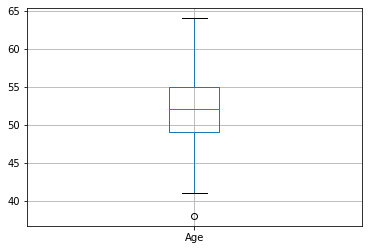

In [194]:
#Print Age boxplot
all_coaches_teams_england[all_coaches_teams_england['Age']>0].boxplot(column="Age")
plt.show()

---

## RQ4

In [195]:
# Generate England_Players DataFrame
england_teams_ID_list = list(teams_england['wyId']) # list teams Id
player_list =[]
for x in england_teams_ID_list:
    player_list.append(players[players['currentTeamId'] ==x ])

england_players = pd.concat(player_list) #DF with England Players info

In [196]:
# Generate England_Events DataFrame
england_players_ID_list = list(england_players['wyId'])
event_list =[]
for x in england_players_ID_list:
    event_list.append(laliga_events[laliga_events['playerId'] == x ])

england_events = pd.concat(event_list) #DF with England Events info

In [197]:
england_events_pass = england_events[england_events['eventName']=='Pass'] # sub-DataFrame with player 'passes'

In [198]:
count_total_pass = {} # dict containing the sums of pass for each player initialized to 0
count_accurate_pass = {} # dict containing the sums of accurate pass for each player initialized to 0
count_ratio_pass = {} # dict containing the ratio = count_accurate_pass/count_total_pass

# initialize
for x in england_players_ID_list:
    
    count_total_pass.update({x:0})
    count_accurate_pass.update({x:0})
    count_ratio_pass.update({x:0})

# count
i = 0
for x in england_events_pass['playerId']:

    count_total_pass[x] += 1
    if str(england_events_pass['tags'].iloc[i]).find('1801') > 0:
        count_accurate_pass[x] += 1
    i +=1    

In [199]:
n = 1000 # minimum threshold

for x in england_players_ID_list: 
    if count_total_pass[x] < n:
        del count_ratio_pass[x]
    else:
        count_ratio_pass[x] = count_accurate_pass[x] / count_total_pass[x]

In [200]:
player_pass =[x[1] for x in sorted((value,key) for (key,value) in count_ratio_pass.items())]

In [201]:
# PRINT
player_pass =[x[1] for x in sorted((value,key) for (key,value) in count_ratio_pass.items())[-10:]] # list of id players to print
for i in player_pass:
    print(players[players['wyId']==i]['shortName'].iloc[0])

Sergi G\u00f3mez
S. Lobotka
G. Cabral
Piqu\u00e9
Sergio Busquets
Jordi Amat
S. Umtiti
A. Mandi
T. Kroos
Javi Garc\u00eda


---

## RQ5

In [202]:
england_events_air_duel = england_events[england_events['subEventName']=='Air duel'] # sub-DataFrame with player 'passes'

In [203]:
count_total_air_duel = {} # dict containing the sums of air_duel for each player initialized to 0
count_accurate_air_duel = {} # dict containing the sums of accurate air_duel for each player initialized to 0
count_ratio_air_duel = {} # dict containing the ratio = count_accurate_air_duel/count_total_air_duel

# initialize
for x in england_players_ID_list:
    count_total_air_duel.update({x:0})
    count_accurate_air_duel.update({x:0})
    count_ratio_air_duel.update({x:0})

# count
i = 0
for x in england_events_air_duel['playerId']:
    count_total_air_duel[x] += 1
    if str(england_events_air_duel['tags'].iloc[i]).find('1801') > 0:
        count_accurate_air_duel[x] += 1
    i +=1    

In [204]:
n = 10 # minimum threshold

for x in england_players_ID_list: 
    if count_total_air_duel[x] < n:
        del count_ratio_air_duel[x]
    else:
        count_ratio_air_duel[x] = count_accurate_air_duel[x] / count_total_air_duel[x]

In [205]:
# Create player_ratio_air_duel DataFrame
lst_player = []
lst_ratio_air_duel = []
for x in count_ratio_air_duel:
    lst_player.append(x)
    lst_ratio_air_duel.append(count_ratio_air_duel[x])
player_ratio_air_duel = pd.DataFrame({'PlayersId':lst_player, 'Ratio air duel': lst_ratio_air_duel})

In [206]:
# Merge player_ratio_air_duel with England Players
air_duel_height = pd.merge(player_ratio_air_duel, england_players[['height', 'wyId', 'shortName']], left_on='PlayersId', right_on='wyId' )

In [207]:
list_id = []
list_class = []
for i in range(len(players['height'])):
    if players.iloc[i]['height'] < 160:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(150)
    elif players.iloc[i]['height'] >= 160 and players.iloc[i]['height'] < 170:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(160)
    elif players.iloc[i]['height'] >= 170 and players.iloc[i]['height'] < 175:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(170)
    elif players.iloc[i]['height'] >= 175 and players.iloc[i]['height'] < 180:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(175)
    elif players.iloc[i]['height'] >= 180 and players.iloc[i]['height'] < 185:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(180)
    elif players.iloc[i]['height'] >= 185 and players.iloc[i]['height'] < 190:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(185)
    elif players.iloc[i]['height'] >= 190 and players.iloc[i]['height'] < 195:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(190)
    elif players.iloc[i]['height'] >= 195 and players.iloc[i]['height'] < 200:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(195)
    else:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(205)

clas = pd.DataFrame(data = list_class, index = list_id, columns=['Class'])
air_duel_height_class = pd.merge(air_duel_height, clas, left_on='PlayersId', right_index=True )

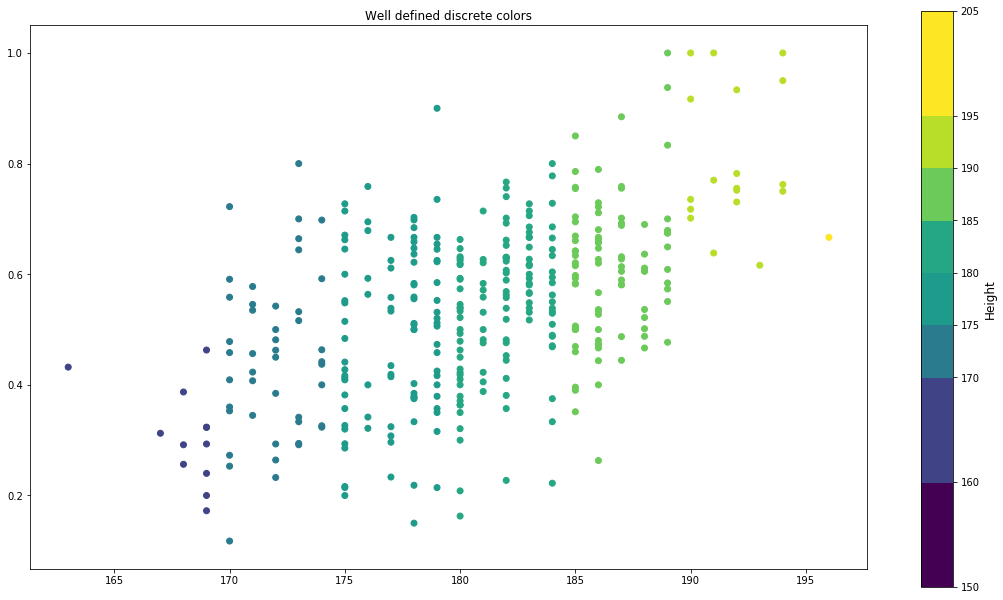

In [208]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))  # setup the plot

x = air_duel_height_class['height']  # define the data
y = air_duel_height_class['Ratio air duel']  # define the data
tag = air_duel_height_class['Class']
#tag[10:12] = 0  # make sure there are some 0 values to show up as grey

cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
#cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist=[0,1,2,3,4,5,6,7,8]
cmaplist[0] = (0.267004, 0.004874, 0.329415, 1.)
cmaplist[1] = (0.262138, 0.242286, 0.520837, 1.)
cmaplist[2] = (0.177423, 0.437527, 0.557565, 1.)
cmaplist[3] = (0.119512, 0.607464, 0.540218, 1.)
cmaplist[4] = (0.119512, 0.607464, 0.540218, 1.)
cmaplist[5] = (0.166383, 0.690856, 0.496502, 1.)
cmaplist[6] = (0.525776, 0.833491, 0.288127, 1.)
cmaplist[7] = (0.762373, 0.876424, 0.137064, 1.)
cmaplist[8] = (0.993248, 0.906157, 0.143936, 1.)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
   'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds =  np.array([150,160,170,175,180,185,190,195,205])#np.linspace(0, 5, 6)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x, y, c=tag, 
                  cmap=cmap, norm=norm)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

ax.set_title('Well defined discrete colors')
ax2.set_ylabel('Height', size=12)
plt.show()

                            OLS Regression Results                            
Dep. Variable:         Ratio air duel   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     153.1
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           1.01e-29
Time:                        22:20:23   Log-Likelihood:                 218.52
No. Observations:                 376   AIC:                            -433.0
Df Residuals:                     374   BIC:                            -425.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1245      0.215     -9.860      0.0

c:\users\ricca\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


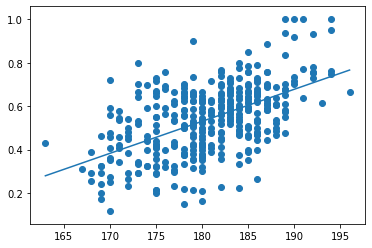

In [209]:
X = air_duel_height_class['height']  # define the data
Y = air_duel_height_class['Ratio air duel']  # define the data

results = sm.OLS(Y,sm.add_constant(X)).fit()

print(results.summary())

plt.scatter(X,Y)

X_plot = np.linspace(155,215,100)

plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)))
plt.show()

---

## RQ6

In [210]:
#with this loop we create two lists with home_team and away_team
home=[]
away=[]
for x in laliga_matches['teamsData']:
    
    for y in x:
        d = {}
        if x[y]['side'] == 'home':
            d['home'] = y
            home.append(y)
        else:
            d['away'] = y
            away.append(y)

In [211]:
laliga_matches_sorted_by_week = laliga_matches.sort_values(by=['gameweek'], ascending=True) 
#sort matches by number of week 
#it is a pandas dataFrame
premier_league_by_week1 = {}
premier_league_by_week = {}

teams_list = []

gameweek_list = []
ht_goal=[]  #list to append the number of goal scored from the home team
at_goal=[]  #list to append the number of goal scored from the away team
for index, match in laliga_matches_sorted_by_week.iterrows():
    # laliga_matches has two main row --> index and match
    
    gameweek = match['gameweek'] #create gameweek (int) from match
    teamsData = match['teamsData'] #create teamsData dic from match
    
    
    home_id, away_id, home_score, away_score, home_points, away_points = '', '', 0,0,0,0
   
    previous_points_home, previous_points_away = 0,0
    
    for key in teamsData: #iterate key in teamsdata
        
        if teamsData[key]['side'] == 'home': #if side of the key is home, home_id is equal to key
            home_id = int(key)
            home_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
            ht_goal.append(home_score)
        else: #if side of the key is away, home_id is equal to key
            away_id = int(key)
            away_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
            at_goal.append(away_score)

In [212]:
matches_teams_VS = pd.DataFrame([list(x.keys()) for x in laliga_matches.teamsData])
WL = pd.DataFrame({'home':home, 'away':away , 'winner':laliga_matches.winner,'week': laliga_matches.gameweek})
WL= WL.sort_values('week') #order based on week
WL['home_goal'] = ht_goal
WL['away_goal'] = at_goal
#WL[-10:]

In [213]:
#Function that calculate the total of goal scored (TGS) and total of goal recived (TGR)
#each team has a code ID
def Total_Goal(code):
    aaa= WL[WL['home']==str(code)]
    bbb= WL[WL['away']==str(code)]
    TGS = sum(aaa['home_goal'])+sum(bbb['away_goal'])
    TGR= sum(aaa['away_goal'])+sum(bbb['home_goal'])
    return([TGS,TGR])

In [214]:
# for loop that takes every code of Premier League's teams:
# to do that we take every matches played in the first week and we append to a list teams ID
teams_en=[]
WL[WL['week']==1]
for i in range(10):
    teams_en.append(home[i])
    teams_en.append(away[i])
#print(teams_en) #print codes 

In [215]:
#we create a for loop that uses the function to create two lists
#in the first list 'tgs' we append the total of goals scored for each team
#in the second 'tgr' the number of goals recived
tgs=[]
tgr=[]
for i in range(20):
    tgs.append(Total_Goal(teams_en[i])[0])
    tgr.append(Total_Goal(teams_en[i])[1])

In [216]:
GoalRank= pd.DataFrame(list(zip(teams_en,tgs,tgr)))
GoalRank.columns = [0, 'TGS','TGR']
GoalRank[0] = pd.to_numeric(GoalRank[0])
GoalRank = pd.merge(GoalRank,teams[['officialName','wyId']], left_on = 0, right_on = 'wyId')
GoalRank = GoalRank[['wyId', 'officialName', 'TGS', 'TGR']]
#GoalRank.head()

In [217]:
# inizialize scores
game_weeks = set(WL['week'])
teams_playing = set(WL['home'])
scores = {}
for i in game_weeks:
    scores[i] = {}
    for x in teams_playing:
        scores[i].update({x:0})

# calculate scores
for i in range(len(WL['week'])):
    if int(WL['winner'][i]) != 0:
        scores[WL['week'][i]][str(WL['winner'][i])] += 3
    else:
        scores[WL['week'][i]][str(WL['home'][i])] += 1
        scores[WL['week'][i]][str(WL['away'][i])] += 1
partial_scores = pd.DataFrame(scores)
#
for x in range(2, len(scores)+1):
    for y in scores[x]:
        scores[x][y] += scores[x-1][y]

#
scores = pd.DataFrame(scores)

In [218]:
#from the table of cumulative scores, we take the last column which is the final rank
scores1= pd.DataFrame(scores[38])
scores1.columns = [0]
scores1= scores1.sort_values(0, ascending=False)
#scores1.head()

In [219]:
#we replicate the team_ID to merge 2 different table
listcode=scores1.index
scores1['Team_ID']=listcode
#scores1.head()

In [220]:
GoalRank=GoalRank.sort_values('TGS',ascending= False)
#GoalRank.head()
#merge

In [221]:
scores1['Team_ID'] = pd.to_numeric(scores1['Team_ID'])
P1 = pd.merge(GoalRank,scores1,left_on='wyId', right_on='Team_ID')
P1 = P1.sort_values(0, ascending=False)
P1.columns= ['wyId','officialName','TGS','TGR','Points','ID']
P1.Points = range(1,21,1)
P1.columns= ['wyId','officialName','TGS','TGR','Rank','ID']
#P1

In [222]:
TGS=list(P1['TGS'])
TGR=list(P1['TGR'])
number= range(1,21)

In [223]:
rank = list(P1['wyId'])
#rank

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     17.91
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           0.000501
Time:                        22:20:26   Log-Likelihood:                -73.444
No. Observations:                  20   AIC:                             150.9
Df Residuals:                      18   BIC:                             152.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.9105      4.661      7.275      0.0

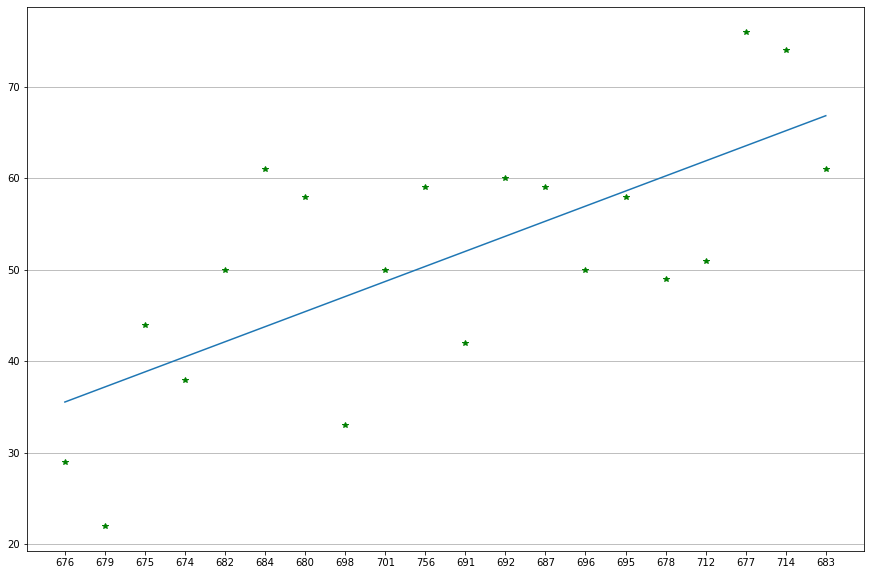

In [224]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
x = number
y = TGR
results1 = sm.OLS(y,sm.add_constant(x)).fit()

print(results1.summary())

my_xticks = rank #lista delle squadre ordinate in base al ranking
plt.xticks(x, my_xticks)
plt.plot(x, y, 'g*')
plt.grid(axis='y', linestyle='-')

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     29.22
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           3.90e-05
Time:                        22:20:26   Log-Likelihood:                -77.801
No. Observations:                  20   AIC:                             159.6
Df Residuals:                      18   BIC:                             161.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.6579      5.795     13.572      0.0

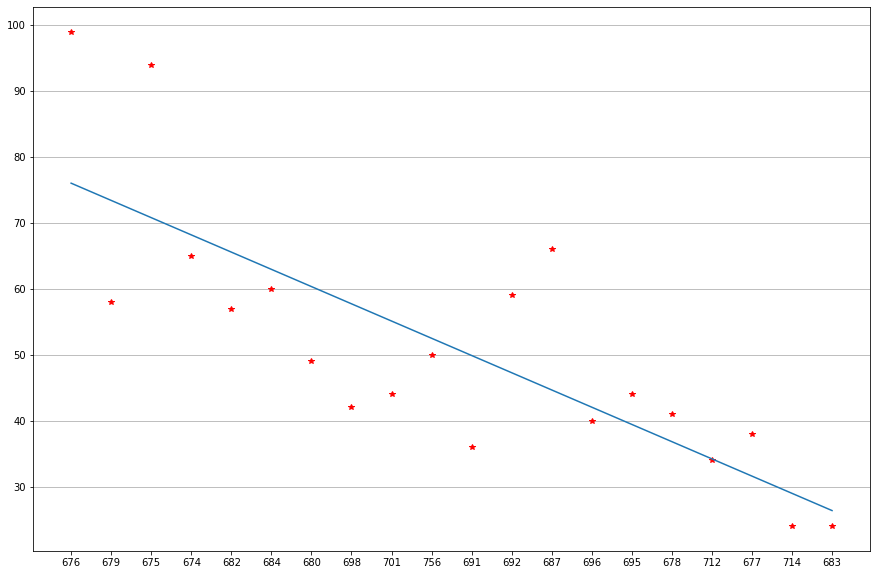

In [225]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
x = number
y1 = TGS
results2 = sm.OLS(y1,sm.add_constant(x)).fit()

print(results2.summary())

my_xticks = rank #lista delle squadre ordinate in base al ranking
plt.xticks(x, my_xticks)
plt.plot(x, y1, 'r*')
plt.grid(axis='y', linestyle='-')

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y1, 1))(np.unique(x)))
plt.show()

These figures show the linear correlation between goals and final position in rank.
Both have a high R-Squared so they are both satisfactory
The second has a higher R-squared which means that in LaLiga there is a stronger correlation between goals scored and final rank's position

---

## GERMANY

## RQ1

In [226]:
bundesliga_matches_sorted_by_week = bundesliga_matches.sort_values(by=['gameweek'], ascending=True) #sort matches by number of week 
#it is a pandas dataFrame
premier_league_by_week1 = {}
premier_league_by_week = {}

teams_list = []

gameweek_list = []
for index, match in bundesliga_matches_sorted_by_week.iterrows():# bundesliga_matches has two main row --> index and match
    
    gameweek = match['gameweek'] #create gameweek (int) from match
    teamsData = match['teamsData'] #create teamsData dic from match
    
    
    home_id, away_id, home_score, away_score, home_points, away_points = '', '', 0,0,0,0
   
    previous_points_home, previous_points_away = 0,0
    
    for key in teamsData: #iterate key in teamsdata
        
        if teamsData[key]['side'] == 'home': #if side of the key is home, home_id is equal to key
            home_id = int(key)
            home_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
        else: #if side of the key is away, home_id is equal to key
            away_id = int(key)
            away_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
  

    #calculate previous points for teams of home and away
    if gameweek > 1: 
        previous_points_home = premier_league_by_week[gameweek-1][home_id]['points']
        previous_points_away = premier_league_by_week[gameweek-1][away_id]['points']
   
    #compare score to decide gaing points for teams of home and away
    if home_score > away_score: 
        home_points = 3
        away_points = 0
    elif away_score > home_score:
        home_points = 0
        away_points = 3
    else:
        home_points = 1
        away_points = 1
        
    home_name = teams[teams["wyId"] == home_id].name.values[0]  #make equale wyId to home_id and take home name
    away_name = teams[teams["wyId"] == away_id].name.values[0]  #make equale wyId to home_id and take away name
    
    if home_name not in teams_list:
        teams_list.append(home_name)
    if gameweek not in gameweek_list:
        gameweek_list.append(gameweek)
    if gameweek in premier_league_by_week:
        premier_league_by_week[gameweek][home_id] = {'team_name' : home_name, 'points' : home_points + previous_points_home }
        premier_league_by_week1[gameweek][home_name] = {'points' : home_points  }
    else:
        premier_league_by_week[gameweek] = {home_id: {'team_name' : home_name, 'points' : home_points + previous_points_home}}
        premier_league_by_week1[gameweek] = {home_name: {'points' : home_points}}
    premier_league_by_week[gameweek][away_id] = {'team_name' : away_name, 'points' : away_points + previous_points_away }
    premier_league_by_week1[gameweek][away_name] = {'points' : away_points  }
    

+ **Find first two longest winning streaks:**

In [227]:
def longestWinningStreak(teamname):
    points_list= []
    localmax =2
    totalmax= 1
    dic_name_points = {}

    for key in premier_league_by_week1:
        
        points_list.append(premier_league_by_week1[key][teamname]['points'] )

    for z in range(1,35):


        if (z<=32) and (points_list[z-1] == points_list[z] == points_list[z+1]==3):
            localmax = localmax +1
        else:
            localmax = 2
        #print('local ' , localmax)

        if localmax > totalmax:
            totalmax = localmax

        
        dic_name_points[teamname] = totalmax
    return(dic_name_points)

WinningStreakAllTeam = {}
var1 = ''
List_WinningStreakAllTeam = []
for j in range(len(teams_list)):
    WinningStreakAllTeam =longestWinningStreak(teams_list[j])
    var1 = WinningStreakAllTeam[teams_list[j]]
    #print(var1)
    List_WinningStreakAllTeam.append(str(var1))

firstMax = 0
secondMax = 0
for i in range(18):
    if (    int(List_WinningStreakAllTeam[i]) > int(firstMax) ):
        firstMax = int(List_WinningStreakAllTeam[i])
        #print(firstMax)
    elif (int(List_WinningStreakAllTeam[i]) > secondMax and int(List_WinningStreakAllTeam[i]) != firstMax ):
        secondMax = int(List_WinningStreakAllTeam[i])
        #print(secondMax)
        
#print(secondMax)
#print(firstMax)
print('First Team/Teams Of Longest Winning Streak')
for m in range(len(teams_list)):
    if(int(List_WinningStreakAllTeam[m]) == int(firstMax)):
        print(teams_list[m], firstMax)

print('Second Team/Teams Of Longest Winning Streak')
for m in range(len(teams_list)):
    if(int(List_WinningStreakAllTeam[m]) == int(secondMax)):
        print(teams_list[m], secondMax)
   

First Team/Teams Of Longest Winning Streak
Bayern M\u00fcnchen 10
Second Team/Teams Of Longest Winning Streak
Schalke 04 6


+ **Find first two longest losing streaks:**

In [228]:
def longestLosingStreak(teamname):
    points_list= []
    localmax =2
    totalmax= 1
    dic_name_points = {}

    for key in premier_league_by_week1:
        
        points_list.append(premier_league_by_week1[key][teamname]['points'] )

    for z in range(1,35):


        if (z<=32) and (points_list[z-1] == points_list[z] == points_list[z+1]==0):
            localmax = localmax +1
        else:
            localmax = 2
        #print('local ' , localmax)

        if localmax > totalmax:
            totalmax = localmax

        
        dic_name_points[teamname] = totalmax
    return(dic_name_points)


LosingStreakAllTeam = {}
var2 = ''
List_LosingStreakAllTeam = []
for k in range(len(teams_list)):
    LosingStreakAllTeam =longestLosingStreak(teams_list[k])
    var2 = LosingStreakAllTeam[teams_list[k]]
    List_LosingStreakAllTeam.append(str(var2))
    
firstMin = 0
secondMin = 0
for i in range(18):
    if (    int(List_LosingStreakAllTeam[i]) > int(firstMin) ):
        firstMin = int(List_LosingStreakAllTeam[i])
        #print(firstMax)
    elif (int(List_LosingStreakAllTeam[i]) > secondMin and int(List_LosingStreakAllTeam[i]) != firstMin ):
        secondMin = int(List_LosingStreakAllTeam[i])

print('First Team/Teams Of Longest Losing Streak')
for m in range(len(teams_list)):
    if(int(List_LosingStreakAllTeam[m]) == int(firstMin)):
        print(teams_list[m], firstMin)

print('Second Team/Teams Of Longest Losing Streak')
for m in range(len(teams_list)):
    if(int(List_LosingStreakAllTeam[m]) == int(secondMin)):
        print(teams_list[m], secondMin)

First Team/Teams Of Longest Losing Streak
Freiburg 5
K\u00f6ln 5
Hannover 96 5
Second Team/Teams Of Longest Losing Streak
Borussia M'gladbach 4
Hamburger SV 4
Stuttgart 4


+ **Create A Dictionary With All Teams And Points For All Gameweeks And Create Plot:**

In [229]:
#create a dictionary with all teams and points for all gameweeks (we need these because of show values on plot)
dict_points = {}
for index,week in premier_league_by_week.items(): #premier_league_by_week is a dic 
    for key, team in week.items():
        if index == 1:
            dict_points[team['team_name']] = [] #define key for points dic
            dict_points[team['team_name']].append(team['points']) #append points for the team
        else:
            dict_points[team['team_name']].append(team['points']) #append points for the team

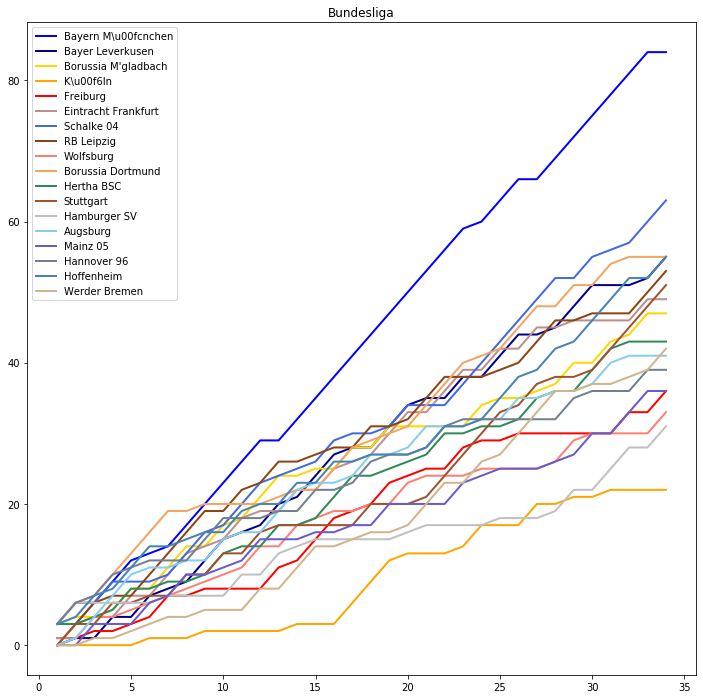

In [230]:
color_names = ['blue', 'darkblue','gold', 'orange','red','rosybrown','royalblue','saddlebrown','salmon','sandybrown',
               'seagreen','sienna','silver','skyblue','slateblue','slategray','steelblue','tan','teal','thistle',
               'tomato','turquoise','violet','wheat','white','whitesmoke','yellow','yellowgreen']


fontP = FontProperties()
fontP.set_size('medium')
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
i = 0
for key,element in dict_points.items():
    ax.plot(gameweek_list,list(element) ,c= color_names[i],ls='-',label=key, linewidth=2)
    i +=1
plt.title('Bundesliga')
plt.legend(prop=fontP)
plt.show()

---

## RQ2

In [231]:
# create a pandas dataframe with the teams playing at home/away
home_away = {}
for i in range(len(bundesliga_matches['teamsData'])):
    home_away[i] = {}
    for x in bundesliga_matches['teamsData'][i]:
        if bundesliga_matches['teamsData'][i][x]['side'] == 'home':
            home_away[i].update({'home': x})
        else:
            home_away[i].update({'away': x})
home_away = pd.DataFrame(home_away).transpose()

In [232]:
# add home_away dataframe to Matches and select the columns for problem 1:
bundesliga_matches_home_away = bundesliga_matches.join(home_away)
subMatches = bundesliga_matches_home_away[[ 'winner', 'home', 'away']]

In [233]:
#TeamL=list(set(subMatches['home']))

In [234]:
TeamL=list(set(subMatches['home']))

def TeamFrame(codeTeam):
    homeM = subMatches[(subMatches['home']==codeTeam)]
    awayM = subMatches[(subMatches['away']==codeTeam)]
    homeM_list=[]

    for i in range(len(homeM)):
        if(homeM.iloc[i]['winner']==int(homeM.iloc[i]['home'])):
            homeM_list.append('home_win')
        elif(homeM.iloc[i]['winner']==0):
            homeM_list.append('home_draw')
        else:
            homeM_list.append('home_lost')
    for i in range(len(awayM)):
        if(awayM.iloc[i]['winner']==int(awayM.iloc[i]['away'])):
            homeM_list.append('away_win')
        elif(awayM.iloc[i]['winner']==0):
            homeM_list.append('away_draw')
        else:
            homeM_list.append('away_lost')
    name = [codeTeam for i in range(38)]
    TeamFrame = pd.DataFrame(zip(name,homeM_list), columns = ['Team', 'Info'])
    
    return TeamFrame

Final = pd.concat([TeamFrame(codeTeam) for codeTeam in TeamL[-5:]])

In [235]:
Final['Team'] = pd.to_numeric(Final['Team'])

In [236]:
Final = pd.merge(Final,teams[['wyId','officialName']], left_on='Team', right_on='wyId')

In [237]:
Final = pd.crosstab(Final.officialName,Final.Info)
Final.transpose()

officialName,BV Borussia 09 Dortmund,Hertha BSC,SC Freiburg,VfB Stuttgart 1893,VfL Wolfsburg
Info,,,,,
away_draw,6,6,6,2,7
away_lost,5,6,10,10,7
away_win,6,5,1,5,3
home_draw,4,7,6,4,8
home_lost,4,5,4,3,6
home_win,9,5,7,10,3


In [238]:
chi2_contingency(Final)

(17.816532644332366,
 0.5994927808908552,
 20,
 array([[5.4, 7.6, 4. , 5.8, 4.4, 6.8],
        [5.4, 7.6, 4. , 5.8, 4.4, 6.8],
        [5.4, 7.6, 4. , 5.8, 4.4, 6.8],
        [5.4, 7.6, 4. , 5.8, 4.4, 6.8],
        [5.4, 7.6, 4. , 5.8, 4.4, 6.8]]))

----

## RQ3

In [239]:
# Add column 'Country' on Teams
country = pd.DataFrame([x['name'] for x in teams['area']],columns=['Country'])
teams_country = pd.merge(teams, country, left_index=True, right_index=True)
teams_england = teams_country[((teams_country['Country'] == 'Germany') & (teams_country['type'] == 'club'))]

In [240]:
# Add column 'Age' on Coaches
current_date = datetime.now().date()
age = []
for x in coaches['birthDate']:
    # because some coach doesn't have the birthDate
    try:
        age.append(int((current_date - date.fromisoformat(x)).days // 365))
    except:
        age.append(0)
age = pd.DataFrame(age, columns=['Age'], dtype=int)
coaches_age = pd.merge(coaches, age, left_index=True, right_index=True)

In [241]:
# check teams coaches in Matches and create pandas dataframe Coaches_Teams_England
teams_coaches = []
# for every matches we take the coach and put it in teams_coaches
for x in (bundesliga_matches['teamsData']):
    for y in x:
        teams_coaches.append({'Team':x[y]['teamId'], 'Coach':x[y]['coachId']})
teams_coaches = pd.DataFrame(teams_coaches)

# merge coaches with teams_coaches
coaches_teams_england = pd.merge(teams_coaches, coaches_age[['currentTeamId', 'birthDate','Age','wyId']], left_on='Coach', right_on='wyId')
#merge Teams with Coaches_teams_England
coaches_teams_england = pd.merge(coaches_teams_england, teams_england[['wyId', 'officialName']], left_on='Team', right_on='wyId' )

'''
Clean DataFrame:
1) remove duplicate row
2) sort by birthDate
3) remove duplicate row with the same officialName and keep last == the youngest coach
''' 
coaches_teams_england = coaches_teams_england.drop_duplicates()
coaches_teams_england = coaches_teams_england.sort_values(by=['birthDate'])
all_coaches_teams_england = coaches_teams_england
coaches_teams_england = coaches_teams_england.drop_duplicates(subset='officialName', keep="last")

In [242]:
all_coaches_teams_england[all_coaches_teams_england['Age']>0]

,Team,Coach,currentTeamId,birthDate,Age,wyId_x,wyId_y,officialName
0,2444,14710,0,1945-05-09,74,14710,2444,FC Bayern M\u00fcnchen
26,2444,269087,3187,1959-06-10,60,269087,2444,FC Bayern M\u00fcnchen
573,2451,145007,0,1962-09-22,57,145007,2451,VfL Wolfsburg
113,2447,638,2446,1963-11-21,55,638,2447,BV Borussia 09 Dortmund
412,2454,15114,2454,1964-09-12,55,15114,2454,Borussia VfL M\u00f6nchengladbach
222,2453,14977,2453,1965-06-11,54,14977,2453,SC Freiburg
544,2451,14735,2451,1966-02-08,53,14735,2451,VfL Wolfsburg
97,2447,266521,0,1966-04-11,53,266521,2447,BV Borussia 09 Dortmund
127,2463,266521,0,1966-04-11,53,266521,2463,1. FC K\u00f6ln
542,2460,16837,2472,1967-03-28,52,16837,2460,1. FSV Mainz 05


In [243]:
# Print the 10 teams with the youngest coaches
teams_young_coaches = coaches_teams_england.sort_values(by=['birthDate']).iloc[-10:]
print('\n'.join(list(teams_young_coaches['officialName'])))

1. FC K\u00f6ln
Hannover 96
Hertha BSC
FC Bayern M\u00fcnchen
1. FSV Mainz 05
FC Augsburg
VfB Stuttgart 1893
SV Werder Bremen
FC Schalke 04
TSG 1899 Hoffenheim


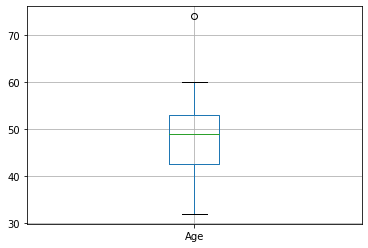

In [244]:
#Print Age boxplot
all_coaches_teams_england[all_coaches_teams_england['Age']>0].boxplot(column="Age")
plt.show()

---

## RQ4

In [245]:
# Generate England_Players DataFrame
england_teams_ID_list = list(teams_england['wyId']) # list teams Id
player_list =[]
for x in england_teams_ID_list:
    player_list.append(players[players['currentTeamId'] ==x ])

england_players = pd.concat(player_list) #DF with England Players info

In [246]:
# Generate England_Events DataFrame
england_players_ID_list = list(england_players['wyId'])
event_list =[]
for x in england_players_ID_list:
    event_list.append(bundesliga_events[bundesliga_events['playerId'] == x ])

england_events = pd.concat(event_list) #DF with England Events info

In [247]:
england_events_pass = england_events[england_events['eventName']=='Pass'] # sub-DataFrame with player 'passes'

In [248]:
count_total_pass = {} # dict containing the sums of pass for each player initialized to 0
count_accurate_pass = {} # dict containing the sums of accurate pass for each player initialized to 0
count_ratio_pass = {} # dict containing the ratio = count_accurate_pass/count_total_pass

# initialize
for x in england_players_ID_list:
    
    count_total_pass.update({x:0})
    count_accurate_pass.update({x:0})
    count_ratio_pass.update({x:0})

# count
i = 0
for x in england_events_pass['playerId']:

    count_total_pass[x] += 1
    if str(england_events_pass['tags'].iloc[i]).find('1801') > 0:
        count_accurate_pass[x] += 1
    i +=1    

In [249]:
n = 1000 # minimum threshold

for x in england_players_ID_list: 
    if count_total_pass[x] < n:
        del count_ratio_pass[x]
    else:
        count_ratio_pass[x] = count_accurate_pass[x] / count_total_pass[x]

In [250]:
player_pass =[x[1] for x in sorted((value,key) for (key,value) in count_ratio_pass.items())]

In [251]:
# PRINT
player_pass =[x[1] for x in sorted((value,key) for (key,value) in count_ratio_pass.items())[-10:]] # list of id players to print
for i in player_pass:
    print(players[players['wyId']==i]['shortName'].iloc[0])

S. Bender
M. Nastasi\u0107
A. Vidal
K. Vogt
C. Tolisso
M. Meyer
Javi Mart\u00ednez
\u00d6. Toprak
Thiago Alc\u00e2ntara
N. S\u00fcle


---

## RQ5

In [252]:
england_events_air_duel = england_events[england_events['subEventName']=='Air duel'] # sub-DataFrame with player 'passes'

In [253]:
count_total_air_duel = {} # dict containing the sums of air_duel for each player initialized to 0
count_accurate_air_duel = {} # dict containing the sums of accurate air_duel for each player initialized to 0
count_ratio_air_duel = {} # dict containing the ratio = count_accurate_air_duel/count_total_air_duel

# initialize
for x in england_players_ID_list:
    count_total_air_duel.update({x:0})
    count_accurate_air_duel.update({x:0})
    count_ratio_air_duel.update({x:0})

# count
i = 0
for x in england_events_air_duel['playerId']:
    count_total_air_duel[x] += 1
    if str(england_events_air_duel['tags'].iloc[i]).find('1801') > 0:
        count_accurate_air_duel[x] += 1
    i +=1    

In [254]:
n = 10 # minimum threshold

for x in england_players_ID_list: 
    if count_total_air_duel[x] < n:
        del count_ratio_air_duel[x]
    else:
        count_ratio_air_duel[x] = count_accurate_air_duel[x] / count_total_air_duel[x]

In [255]:
# Create player_ratio_air_duel DataFrame
lst_player = []
lst_ratio_air_duel = []
for x in count_ratio_air_duel:
    lst_player.append(x)
    lst_ratio_air_duel.append(count_ratio_air_duel[x])
player_ratio_air_duel = pd.DataFrame({'PlayersId':lst_player, 'Ratio air duel': lst_ratio_air_duel})

In [256]:
# Merge player_ratio_air_duel with England Players
air_duel_height = pd.merge(player_ratio_air_duel, england_players[['height', 'wyId', 'shortName']], left_on='PlayersId', right_on='wyId' )

In [257]:
list_id = []
list_class = []
for i in range(len(players['height'])):
    if players.iloc[i]['height'] < 160:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(150)
    elif players.iloc[i]['height'] >= 160 and players.iloc[i]['height'] < 170:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(160)
    elif players.iloc[i]['height'] >= 170 and players.iloc[i]['height'] < 175:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(170)
    elif players.iloc[i]['height'] >= 175 and players.iloc[i]['height'] < 180:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(175)
    elif players.iloc[i]['height'] >= 180 and players.iloc[i]['height'] < 185:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(180)
    elif players.iloc[i]['height'] >= 185 and players.iloc[i]['height'] < 190:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(185)
    elif players.iloc[i]['height'] >= 190 and players.iloc[i]['height'] < 195:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(190)
    elif players.iloc[i]['height'] >= 195 and players.iloc[i]['height'] < 200:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(195)
    else:
        list_id.append(players.iloc[i]['wyId'])
        list_class.append(205)

clas = pd.DataFrame(data = list_class, index = list_id, columns=['Class'])
air_duel_height_class = pd.merge(air_duel_height, clas, left_on='PlayersId', right_index=True )

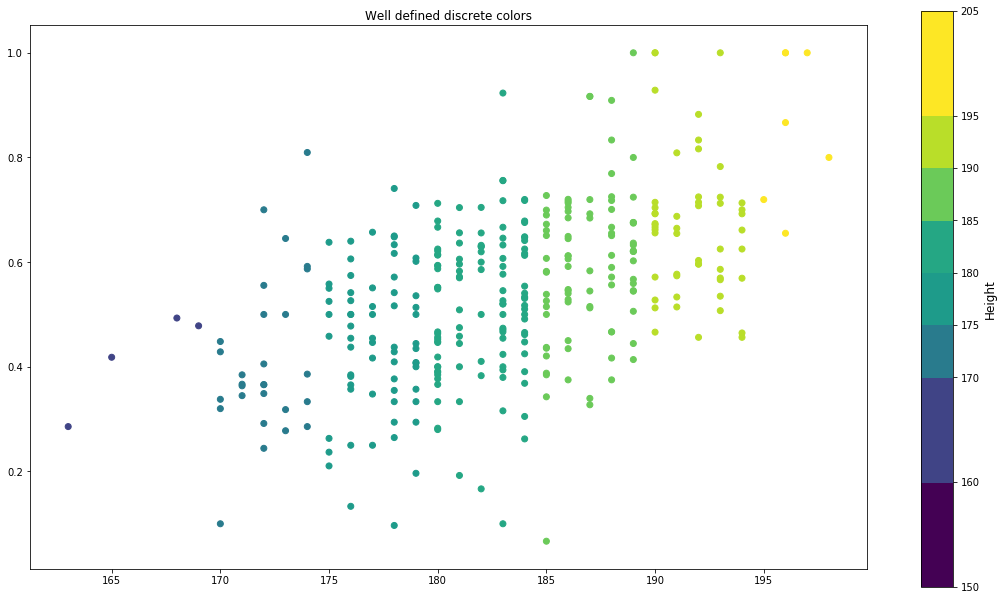

In [258]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))  # setup the plot

x = air_duel_height_class['height']  # define the data
y = air_duel_height_class['Ratio air duel']  # define the data
tag = air_duel_height_class['Class']
#tag[10:12] = 0  # make sure there are some 0 values to show up as grey

cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
#cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist=[0,1,2,3,4,5,6,7,8]
cmaplist[0] = (0.267004, 0.004874, 0.329415, 1.)
cmaplist[1] = (0.262138, 0.242286, 0.520837, 1.)
cmaplist[2] = (0.177423, 0.437527, 0.557565, 1.)
cmaplist[3] = (0.119512, 0.607464, 0.540218, 1.)
cmaplist[4] = (0.119512, 0.607464, 0.540218, 1.)
cmaplist[5] = (0.166383, 0.690856, 0.496502, 1.)
cmaplist[6] = (0.525776, 0.833491, 0.288127, 1.)
cmaplist[7] = (0.762373, 0.876424, 0.137064, 1.)
cmaplist[8] = (0.993248, 0.906157, 0.143936, 1.)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
   'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds =  np.array([150,160,170,175,180,185,190,195,205])#np.linspace(0, 5, 6)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x, y, c=tag, 
                  cmap=cmap, norm=norm)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

ax.set_title('Well defined discrete colors')
ax2.set_ylabel('Height', size=12)
plt.show()

                            OLS Regression Results                            
Dep. Variable:         Ratio air duel   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     137.9
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           4.54e-27
Time:                        22:20:44   Log-Likelihood:                 191.45
No. Observations:                 352   AIC:                            -378.9
Df Residuals:                     350   BIC:                            -371.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0045      0.217     -9.229      0.0

c:\users\ricca\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


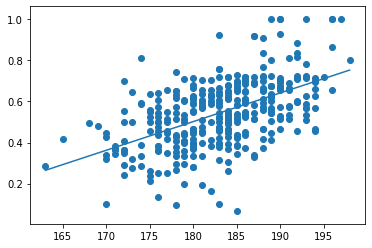

In [259]:
X = air_duel_height_class['height']  # define the data
Y = air_duel_height_class['Ratio air duel']  # define the data

results = sm.OLS(Y,sm.add_constant(X)).fit()

print(results.summary())

plt.scatter(X,Y)

X_plot = np.linspace(155,215,100)

plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)))
plt.show()

---

## RQ6

In [260]:
#with this loop we create two lists with home_team and away_team
home=[]
away=[]
for x in bundesliga_matches['teamsData']:
    
    for y in x:
        d = {}
        if x[y]['side'] == 'home':
            d['home'] = y
            home.append(y)
        else:
            d['away'] = y
            away.append(y)

In [261]:
bundesliga_matches_sorted_by_week = bundesliga_matches.sort_values(by=['gameweek'], ascending=True) 
#sort matches by number of week 
#it is a pandas dataFrame
premier_league_by_week1 = {}
premier_league_by_week = {}

teams_list = []

gameweek_list = []
ht_goal=[]  #list to append the number of goal scored from the home team
at_goal=[]  #list to append the number of goal scored from the away team
for index, match in bundesliga_matches_sorted_by_week.iterrows():
    # bundesliga_matches has two main row --> index and match
    
    gameweek = match['gameweek'] #create gameweek (int) from match
    teamsData = match['teamsData'] #create teamsData dic from match
    
    
    home_id, away_id, home_score, away_score, home_points, away_points = '', '', 0,0,0,0
   
    previous_points_home, previous_points_away = 0,0
    
    for key in teamsData: #iterate key in teamsdata
        
        if teamsData[key]['side'] == 'home': #if side of the key is home, home_id is equal to key
            home_id = int(key)
            home_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
            ht_goal.append(home_score)
        else: #if side of the key is away, home_id is equal to key
            away_id = int(key)
            away_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
            at_goal.append(away_score)

In [262]:
matches_teams_VS = pd.DataFrame([list(x.keys()) for x in bundesliga_matches.teamsData])
WL = pd.DataFrame({'home':home, 'away':away , 'winner':bundesliga_matches.winner,'week': bundesliga_matches.gameweek})
WL= WL.sort_values('week') #order based on week
WL['home_goal'] = ht_goal
WL['away_goal'] = at_goal
#WL[-10:]

In [263]:
#Function that calculate the total of goal scored (TGS) and total of goal recived (TGR)
#each team has a code ID
def Total_Goal(code):
    aaa= WL[WL['home']==str(code)]
    bbb= WL[WL['away']==str(code)]
    TGS = sum(aaa['home_goal'])+sum(bbb['away_goal'])
    TGR= sum(aaa['away_goal'])+sum(bbb['home_goal'])
    return([TGS,TGR])

In [264]:
# for loop that takes every code of Premier League's teams:
# to do that we take every matches played in the first week and we append to a list teams ID
teams_en=[]
WL[WL['week']==1]
for i in range(10):
    teams_en.append(home[i])
    teams_en.append(away[i])
#print(teams_en) #print codes 

In [265]:
#we create a for loop that uses the function to create two lists
#in the first list 'tgs' we append the total of goals scored for each team
#in the second 'tgr' the number of goals recived
tgs=[]
tgr=[]
for i in range(20):
    tgs.append(Total_Goal(teams_en[i])[0])
    tgr.append(Total_Goal(teams_en[i])[1])

In [266]:
GoalRank= pd.DataFrame(list(zip(teams_en,tgs,tgr)))
GoalRank.columns = [0, 'TGS','TGR']
GoalRank[0] = pd.to_numeric(GoalRank[0])
GoalRank = pd.merge(GoalRank,teams[['officialName','wyId']], left_on = 0, right_on = 'wyId')
GoalRank = GoalRank[['wyId', 'officialName', 'TGS', 'TGR']]
#GoalRank.head()

In [267]:
# inizialize scores
game_weeks = set(WL['week'])
teams_playing = set(WL['home'])
scores = {}
for i in game_weeks:
    scores[i] = {}
    for x in teams_playing:
        scores[i].update({x:0})

# calculate scores
for i in range(len(WL['week'])):
    if int(WL['winner'][i]) != 0:
        scores[WL['week'][i]][str(WL['winner'][i])] += 3
    else:
        scores[WL['week'][i]][str(WL['home'][i])] += 1
        scores[WL['week'][i]][str(WL['away'][i])] += 1
partial_scores = pd.DataFrame(scores)
#
for x in range(2, len(scores)+1):
    for y in scores[x]:
        scores[x][y] += scores[x-1][y]

#
scores = pd.DataFrame(scores)

In [268]:
#from the table of cumulative scores, we take the last column which is the final rank
scores1= pd.DataFrame(scores[34])
scores1.columns = [0]
scores1= scores1.sort_values(0, ascending=False)
#scores1.head()

In [269]:
#we replicate the team_ID to merge 2 different table
listcode=scores1.index
scores1['Team_ID']=listcode
#scores1.head()

In [270]:
GoalRank=GoalRank.sort_values('TGS',ascending= False)
#GoalRank.head()
#merge

In [271]:
scores1['Team_ID'] = pd.to_numeric(scores1['Team_ID'])
P1 = pd.merge(GoalRank,scores1,left_on='wyId', right_on='Team_ID')
P1 = P1.sort_values(0, ascending=False)
P1.columns= ['wyId','officialName','TGS','TGR','Points','ID']
P1.Points = range(1,21,1)
P1.columns= ['wyId','officialName','TGS','TGR','Rank','ID']
#P1

In [272]:
TGS=list(P1['TGS'])
TGR=list(P1['TGR'])
number= range(1,21)

In [273]:
rank = list(P1['wyId'])
#rank

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     16.25
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           0.000784
Time:                        22:20:44   Log-Likelihood:                -64.742
No. Observations:                  20   AIC:                             133.5
Df Residuals:                      18   BIC:                             135.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.0421      3.017     12.280      0.0

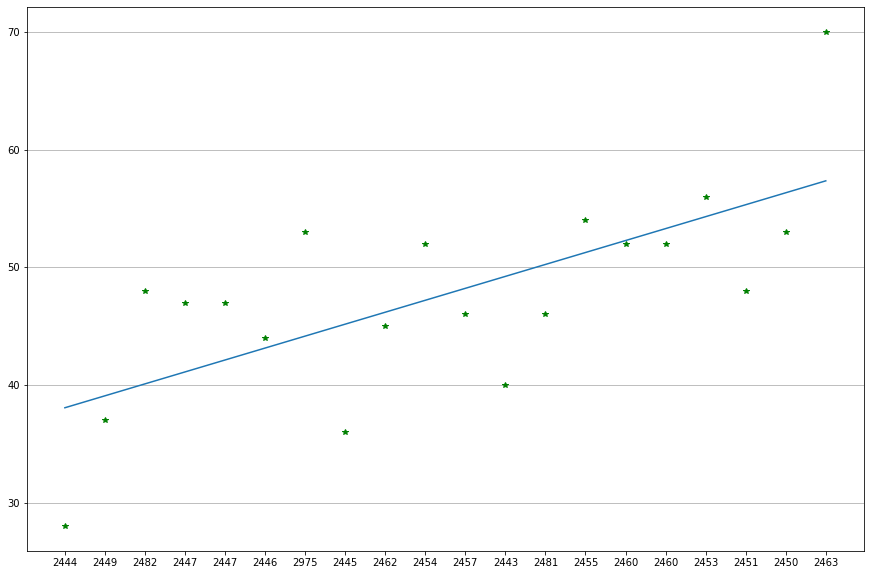

In [274]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
x = number
y = TGR
results1 = sm.OLS(y,sm.add_constant(x)).fit()

print(results1.summary())

my_xticks = rank #lista delle squadre ordinate in base al ranking
plt.xticks(x, my_xticks)
plt.plot(x, y, 'g*')
plt.grid(axis='y', linestyle='-')

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     44.97
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           2.74e-06
Time:                        22:20:45   Log-Likelihood:                -69.902
No. Observations:                  20   AIC:                             143.8
Df Residuals:                      18   BIC:                             145.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.8000      3.904     18.133      0.0

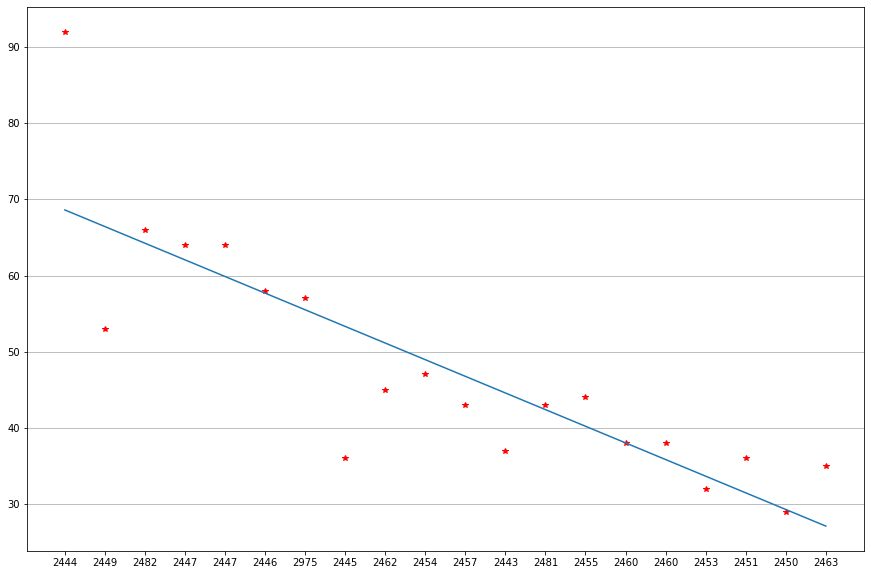

In [275]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
x = number
y1 = TGS
results2 = sm.OLS(y1,sm.add_constant(x)).fit()

print(results2.summary())

my_xticks = rank #lista delle squadre ordinate in base al ranking
plt.xticks(x, my_xticks)
plt.plot(x, y1, 'r*')
plt.grid(axis='y', linestyle='-')

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y1, 1))(np.unique(x)))
plt.show()

These figures show the linear correlation between goals and final position in rank.
Both have a high R-Squared so they are both satisfactory
The second has a higher R-squared which means that in Bundesliga there is a stronger correlation between goals scored and final rank's position

----